************
# <font color=#7451eb><center> Notebook d’exploration des données</center></font>
## <font color=#7451eb><center> PROJET n° 3 : Concevez une application au service de la santé publique</center></font>
************   

## <font color=#7451eb>CONTENU DU NOTEBOOK</font> :
<br>

&#9989; **Chapitre 1 : Analyse univariée**
* 1.1 Exploration du dataset cleaned.<br>
* 1.2 Résumé des statistiques descriptives par variable.
* 1.2 Analyse de la distribution des variables.<br>
    * 1.2.1 Histogramme.<br>
    * 1.2.2 Droite d'Henry.<br>
    * 1.2.3 Test de normalité.<br>
* 1.4 Boxplot.<br>
* 1.5 Traitement des outliers univariée.<br>
* 1.6 Scatter plot.<br>
**********
&#9989; **Chapitre 2 : Analyse bivariée**
* 2.1 Matrice des corrélations<br>
* 2.2 Graphique croisant 2 variables numériques<br>
* 2.3 Graphique croisant 1 variable numérique + 1 variable catégorielle<br>
* 2.4 Traitement des outliers bivariée<br>
**********
&#9989; **Chapitre 3 : Analyse multivarié**
* 3.1 Analyse en composantes principales<br>
* 3.2 Analyse explicatibe avec l'ANOV<br>
**********
&#9989; **Chapitre 4 : Questions - Réponses**
* 4.1 En France, quel est le % des produits vendus `Made in France` vs les produits `Not Made in France` ?<br>
* 4.2 Entre les produits **Made in France** et les produits **Not Made in France**, lesquels ont de façon globale un **meilleur score grade** ?<br>
* 4.7 Est-ce que **la moyenne**, **la médiane** et l'**écart-types** des produits **Made in France** sont égaux aux produits **Not Made in France** ? .<br>
* 4.3 Entre les produits **Made in France** et les produits **Not Made in France**, lesquels ont un **meilleur score grade par catégorie** ?<br>
* 4.4 Quelles sont **les marques** qui proposent des produits avec un **excellent score grade** ?<br>
**********

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

*********
# <font color=#7451eb> Chapitre 1 : Analyse univariée</font>
*********

### <img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Exploration du dataset cleaned.

In [2]:
df_cleaned = pd.read_csv("data/df_cleaned.csv")

In [3]:
df_cleaned.head()

,code,url,product_name,pnns_groups_1,pnns_groups_2,manufacturing_places,additives_n,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts_100g,sodium_100mg,nutri_score_calculated,nutri_grade_calculated
0,0000000005,http://world-en.openfoodfacts.org/product/0000...,Nectar d'abricot,Beverages,Sweetened beverages,Not Made in France,0.0,1598.0,45.50,27.5,2.80,16.445,16.93,1.3,75.0,520.0,18,e
1,0000000020114,http://world-en.openfoodfacts.org/product/0000...,Naturablue original,unknown,unknown,Made in France,1.0,0.0,0.00,0.0,0.00,0.000,0.00,0.0,0.0,0.0,0,b
2,0000000274722,http://world-en.openfoodfacts.org/product/0000...,Blanquette de Volaille et son Riz,Composite foods,One-dish meals,Made in France,2.0,450.0,2.20,0.9,0.50,0.500,6.80,0.7,57.0,280.0,-1,a
3,0000007730009,http://world-en.openfoodfacts.org/product/0000...,Biscuits sablés fourrage au cacao,Sugary snacks,Biscuits and cakes,Made in France,3.0,1866.0,20.45,10.5,36.85,2.350,6.75,0.7,35.0,280.0,24,e
4,0000009336247,http://world-en.openfoodfacts.org/product/0000...,Bonbons acidulés Raisin Fraise,Sugary snacks,Sweets,Not Made in France,7.0,1674.0,0.00,0.0,93.30,0.000,0.00,0.0,32.0,0.0,14,d


 <img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Vérification de la présence des valeurs manquantes.

In [4]:
df_cleaned.isna().sum().sort_values()

code                             0
sodium_100mg                     0
fruits-vegetables-nuts_100g      0
salt_100g                        0
proteins_100g                    0
fiber_100g                       0
sugars_100g                      0
saturated-fat_100g               0
fat_100g                         0
energy_100g                      0
additives_n                      0
manufacturing_places             0
pnns_groups_2                    0
url                              0
nutri_score_calculated           0
nutri_grade_calculated           0
pnns_groups_1                    1
product_name                   313
dtype: int64

<img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Dataset shape.

In [5]:
df_cleaned.shape

(59237, 18)

<img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Type de données par colonne.

In [6]:
df_cleaned.dtypes.sort_values(ascending=False)

code                            object
pnns_groups_2                   object
url                             object
manufacturing_places            object
nutri_grade_calculated          object
pnns_groups_1                   object
product_name                    object
additives_n                    float64
energy_100g                    float64
fat_100g                       float64
sugars_100g                    float64
fiber_100g                     float64
proteins_100g                  float64
salt_100g                      float64
fruits-vegetables-nuts_100g    float64
sodium_100mg                   float64
saturated-fat_100g             float64
nutri_score_calculated           int64
dtype: object

<img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Vérification de la présence de doublons sur la colonne `code`.

In [7]:
df_cleaned.duplicated(subset="code").sum()

0

### <img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Résumé des statistiques descriptives par variable.

In [8]:
for c in df_cleaned.select_dtypes(include=["int64", "float64"]):
    print(c)
    print(df_cleaned[c].describe())
    print("-" * 80)

additives_n
count    59237.000000
mean         1.505609
std          2.269110
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         25.000000
Name: additives_n, dtype: float64
--------------------------------------------------------------------------------
energy_100g
count    59237.000000
mean      1128.319354
std        733.837755
min          0.000000
25%        515.000000
50%       1078.361082
75%       1598.000000
max      12900.000000
Name: energy_100g, dtype: float64
--------------------------------------------------------------------------------
fat_100g
count    59237.000000
mean        16.659899
std         17.681616
min          0.000000
25%          2.500000
50%         11.000000
75%         26.000000
max        100.000000
Name: fat_100g, dtype: float64
--------------------------------------------------------------------------------
saturated-fat_100g
count    59237.000000
mean         7.599554
std          9.896723
min         

||additives_n|energy_100g|fat_100g|saturated-fat_100g|sugars_100g|fiber_100g|proteins_100g|salt_100g|fruits-vegetables-nuts_100g|sodium_100mg|nutri_score_calculated|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|mean|1.5|1128|16.65|7.59|11.16|9.33|9.37|1.46|65.35|587.14|5.82|
|std|2.2|733|17.68|9.89|16.96|13.26|7.97|5.95|23.81|2383.89|8.98|
|min|0|0|0|0|-1|0|0|0|0|0|-16|   
|25%|0|515|2.5|0.6|1|0.50|3.20|0.11|50|44|-1|     
|50%|1|1078|11|3.1|2.80|2.35|7.40|0.80|70|320|6|   
|75%|2|1598|26|11|13|16.44|16|1.30|90|520|12|      
|max|25|12900|100|189|105|100|110|575|100|230000|38|   

<img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Rappel du calcul du nutri_score selon l'**Agence Nationale de Santé Publique France**.
* Pour plus d'information, merci de consulter le lien suivant : [lien](https://www.santepubliquefrance.fr/content/download/150262/file/QR_scientifique_technique_150421.pdf)

* Le **calcul** du **score nutritionnel** est **basé** sur des **données** nutritionnelles **pour 100g** de produit, dont les nutriments font partie de la déclaration nutritionnelle obligatoire ou qui peuvent la compléter dans le respect de l’article 30 du règlement « INCO » n°1169/2011, soit:
|variable | unité de mesure | valeur min |valeur max|
|:-|:-|:-:|:-:|
|Valeur énergétique| (KJ/100g ou 100mL)|**0**| **XX**|
|Matières grasses| (g/100g ou 100mL)|**0**| **100**|
|Acides gras saturés| (g/100g ou 100mL)|**0**| **100**|
|Sucres| (g/100g ou 100mL)|**0**| **100**|
|Protéines| (g/100g ou 100mL)|**0**| **100**|
|Sel| (g/100g ou 100mL)|**0**| **100**|
|Fibres| (g/100g ou 100mL)|**0**| **100**|
|Sodium| (mg/100g ou 100mL)|**0**| **1000**|
|Fruits, légumes, légumineuses, fruits à coques, huiles de colza, de noix et d'olive| (%/100g ou 100mL)|**0%**| **100%**|

- Sachant que les valeurs des variables communiquées sont pour `100g` de produit.
- La teneur max de chaque variable ne peut être > `100g`

|Variable|Valeurs|Présence d'anomalies ?|
|:----|:----|:----|
|`additives_n`|min=0<br>max=25| voir analyse des outliers|
|`energy_100g`|min=0<br>max=12900| voir analyse des outliers|
|`fat_100g`|min=0<br>max=100|voir analyse des outliers|
|`saturated-fat_100g`|min=0<br>max=189|**Oui** car la valeur max > **100g**|
|`sugars_100g`|min=-1<br>max=105|**Oui** car la valeur max > **100g** et la valeur min < **0g**|
|`fiber_100g`|min=0<br>max=100|voir analyse des outliers|
|`proteins_100g`|min=0<br>max=110|**Oui** car la valeur max > **100g**|
|`salt_100g`|min=0<br>max=575|**Oui** car la valeur max > **100g**|
|`fruits-vegetables-nuts_100g`|100g|voir analyse des outliers|
|`sodium_100mg`|min=0<br>max=230000g<br>std=1906|**Oui** car les valeurs max et std > **1000mg**|


<img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Remplacement des valeurs aberrantes par des valeurs NaN sur les variables:
- `saturated-fat_100g`.
- `sugars_100g`.
- `proteins_100g`.
- `salt_100g`
- `sodium_100mg`
<br>
<br>
* **Premièrement** nous allons **remplacer** les valeurs **aberrantes** par **NaN**.
* **Deuxièmement** et à la **fin** de la **section** **analyse** des **outliers**, **toutes** les valeurs **NaN** seront **imputées** avec la **fonction**  d'imputation  **créée** dans le **notebook** de **nettoyage**.
* **Troisièmement** et à la **fin** de la **section** **analyse** des **outliers**, nous allons **recalculer** le **nutri_score** et le **nutri_grade** pour **toutes** les **lignes** qui contenaient des valeurs **aberrantes**.

<img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Création d'une fonction pour remplacer les valeurs aberrantes au-delà des min et max par des valeurs NaN.

In [9]:
def clean_min_max_valeus(dataframe):

    liste_columns = [
        "saturated-fat_100g",
        "sugars_100g",
        "proteins_100g",
        "salt_100g",
    ]

    for column in liste_columns:
        print(
            f"{column} Nbr de valeurs < 0g détectées ", np.sum((dataframe[column] < 0))
        )
        print(
            f"{column} Nbr de valeurs > 100g détectées ",
            np.sum((dataframe[column] > 100)),
        )
        dataframe.loc[dataframe[column] < 0, ["nutri_grade_calculated"]] = float("nan")
        dataframe.loc[dataframe[column] < 0, ["nutri_score_calculated"]] = float("nan")
        dataframe.loc[dataframe[column] > 100, ["nutri_grade_calculated"]] = float(
            "nan"
        )
        dataframe.loc[dataframe[column] > 100, ["nutri_score_calculated"]] = float(
            "nan"
        )
        dataframe.loc[dataframe[column] < 0] = float("nan")
        dataframe.loc[dataframe[column] > 100] = float("nan")
        print(" " * 80)
        print(
            f"{column} Nbr de valeurs < 0g détectées APRES transformation en NaN",
            np.sum((dataframe[column] < 0)),
        )
        print(
            f"{column} Nbr de valeurs > 100g détectées APRES transformation en NaN",
            np.sum((dataframe[column] > 100)),
        )
        print("-" * 80)
    print(
        "sodium_100mg Nbr de valeurs < 0mg détectées AVANT correction",
        np.sum((dataframe["sodium_100mg"] < 0)),
    )
    print(
        "sodium_100mg Nbr de valeurs > 1000g détectées AVANT correction",
        np.sum((dataframe["sodium_100mg"] > 1000)),
    )
    dataframe.loc[dataframe["sodium_100mg"] < 0, ["nutri_grade_calculated"]] = float(
        "nan"
    )
    dataframe.loc[dataframe["sodium_100mg"] < 0, ["nutri_score_calculated"]] = float(
        "nan"
    )
    dataframe.loc[dataframe["sodium_100mg"] > 1000, ["nutri_grade_calculated"]] = float(
        "nan"
    )
    dataframe.loc[dataframe["sodium_100mg"] > 1000, ["nutri_score_calculated"]] = float(
        "nan"
    )
    dataframe.loc[dataframe["sodium_100mg"] < 0] = float("nan")
    dataframe.loc[dataframe["sodium_100mg"] > 1000] = float("nan")
    print(" " * 80)
    print(
        "sodium_100mg Nbr de valeurs < 0mg détectées",
        np.sum((dataframe["sodium_100mg"] < 0)),
    )
    print(
        "sodium_100mg Nbr de valeurs > 1000g détectées APRES transformation en NaN",
        np.sum((dataframe["sodium_100mg"] > 1000)),
    )
    print("-" * 80)

    liste_columns.append("sodium_100mg")
    print(" ")
    print("Vérification de la correction des valeurs max et min aberrantes.")
    return dataframe[liste_columns].describe()

In [10]:
clean_min_max_valeus(df_cleaned)

saturated-fat_100g Nbr de valeurs < 0g détectées  0
saturated-fat_100g Nbr de valeurs > 100g détectées  2
                                                                                
saturated-fat_100g Nbr de valeurs < 0g détectées APRES transformation en NaN 0
saturated-fat_100g Nbr de valeurs > 100g détectées APRES transformation en NaN 0
--------------------------------------------------------------------------------
sugars_100g Nbr de valeurs < 0g détectées  1
sugars_100g Nbr de valeurs > 100g détectées  1
                                                                                
sugars_100g Nbr de valeurs < 0g détectées APRES transformation en NaN 0
sugars_100g Nbr de valeurs > 100g détectées APRES transformation en NaN 0
--------------------------------------------------------------------------------
proteins_100g Nbr de valeurs < 0g détectées  0
proteins_100g Nbr de valeurs > 100g détectées  1
                                                                            

,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,sodium_100mg
count,55402.000000,55402.000000,55402.000000,55402.000000,55402.000000
mean,7.724208,11.556758,8.921471,0.748288,299.315172
std,9.977750,17.203778,7.439622,0.634517,253.806792
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,1.100000,3.100000,0.100000,40.000000
50%,3.100000,2.800000,7.100000,0.700000,280.000000
75%,11.000000,14.000000,15.000000,1.300000,520.000000
max,100.000000,100.000000,100.000000,2.500000,1000.000000


### <img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Analyse de la distribution des variables

In [11]:
sns.set(style="white", font_scale=1.5)

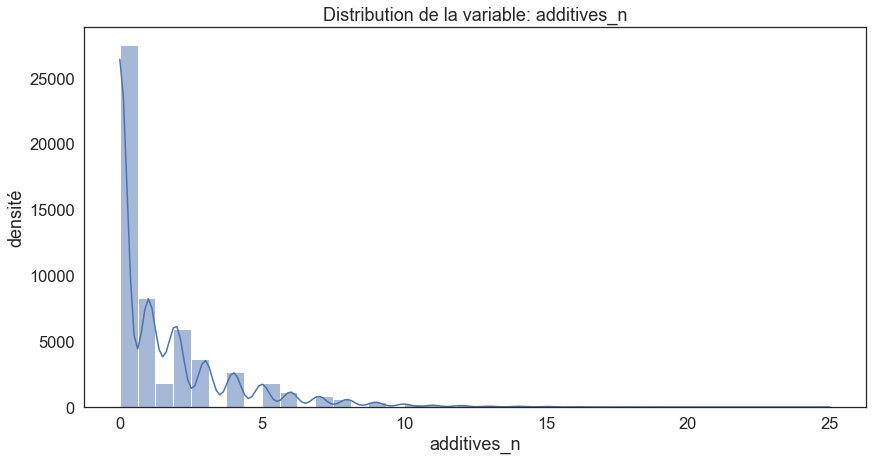

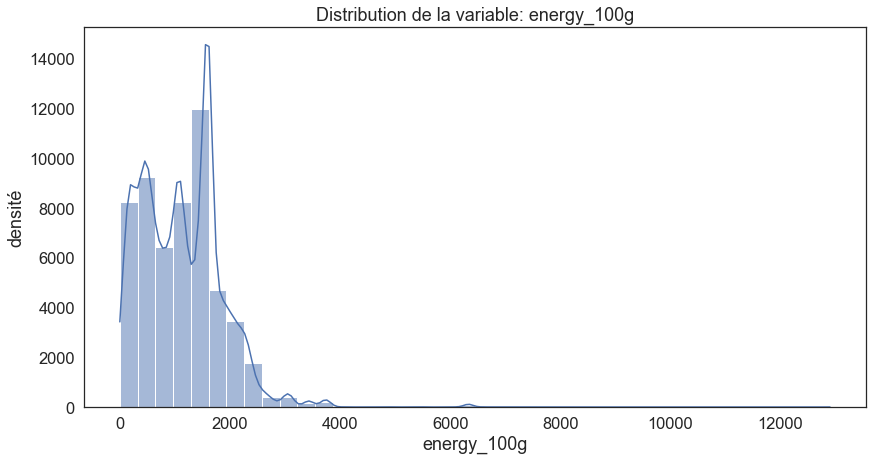

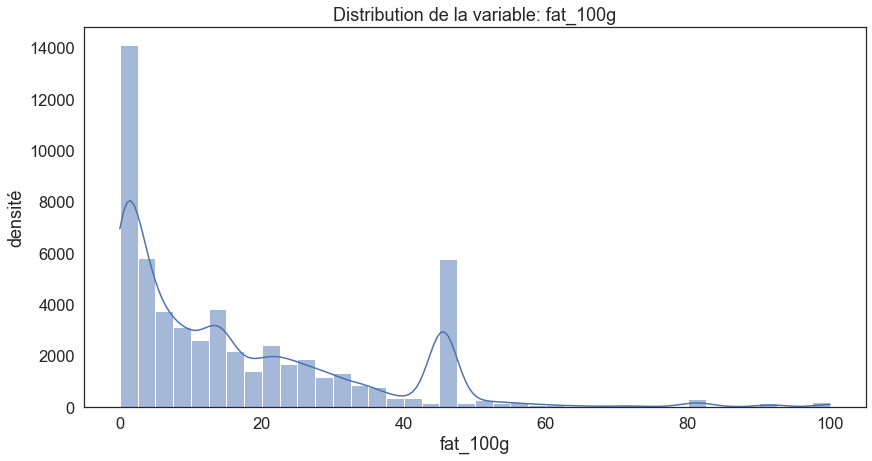

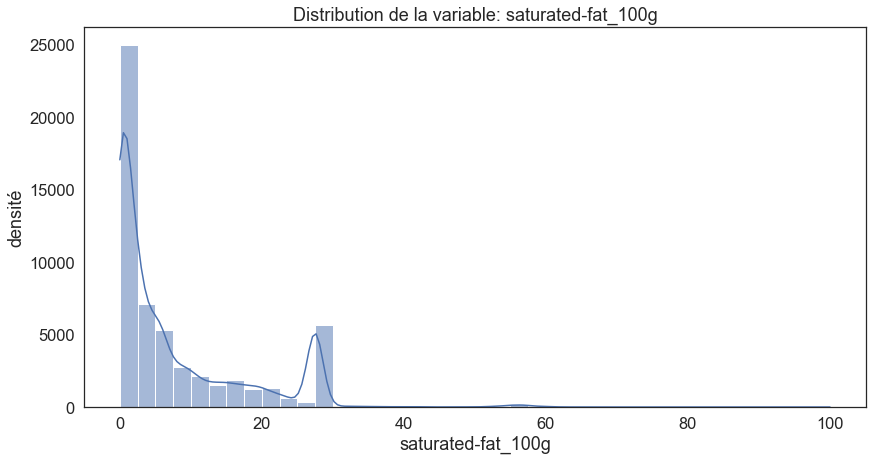

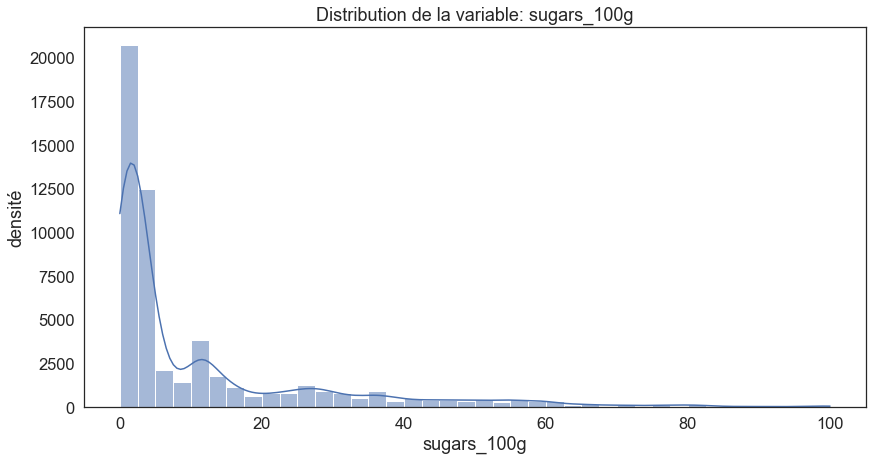

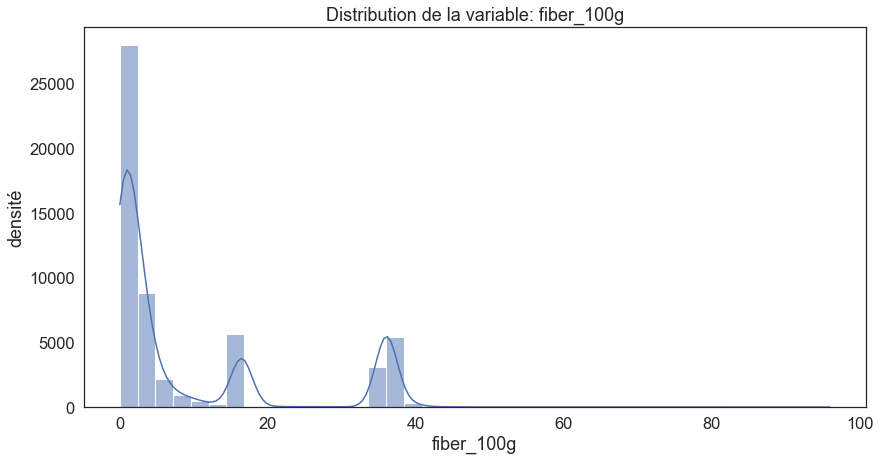

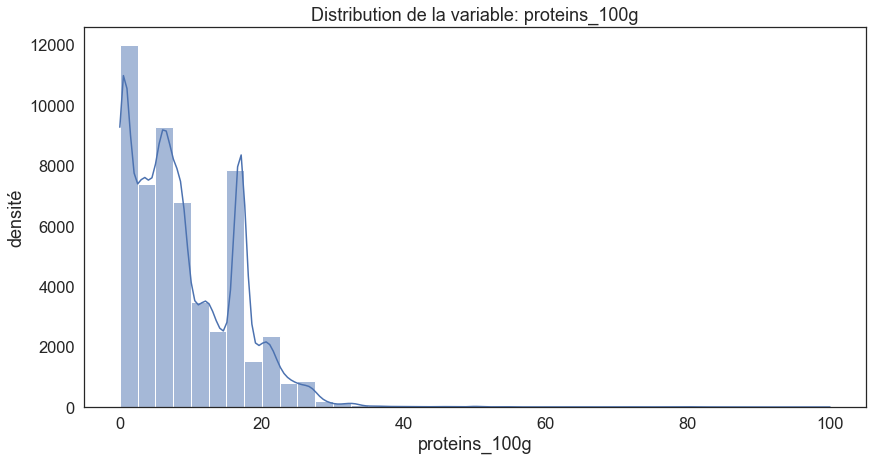

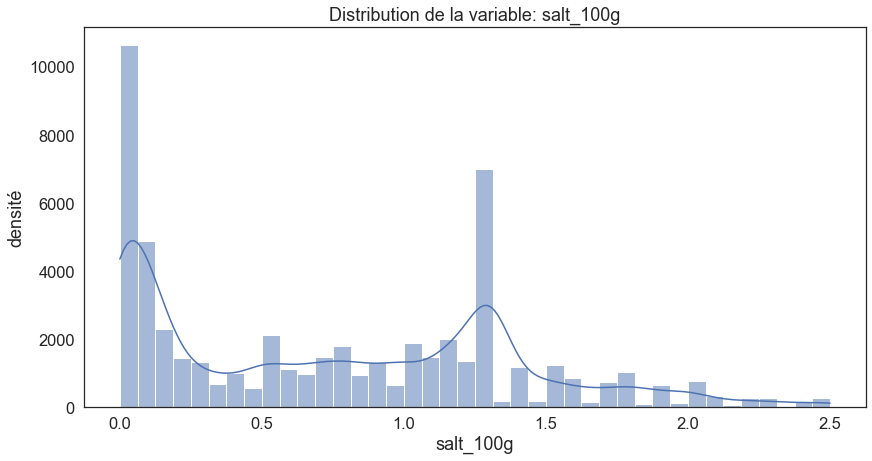

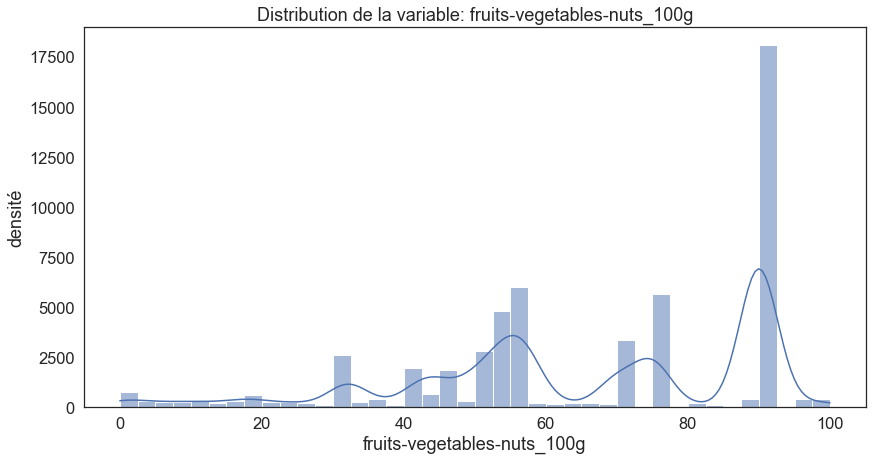

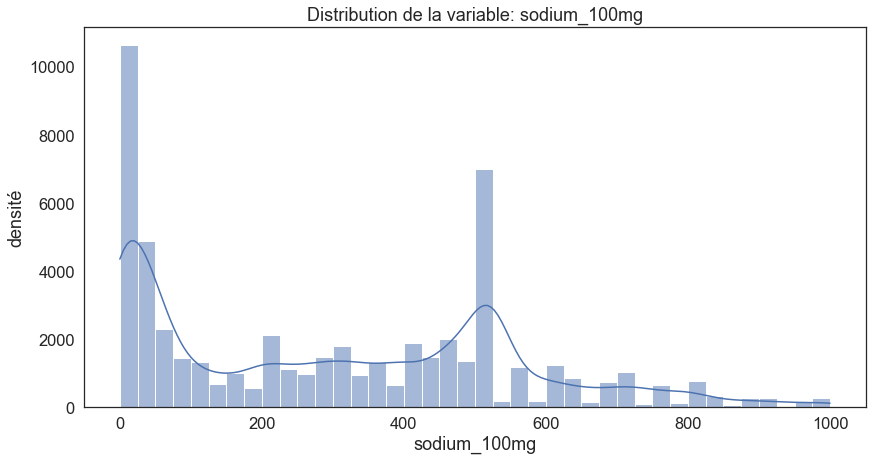

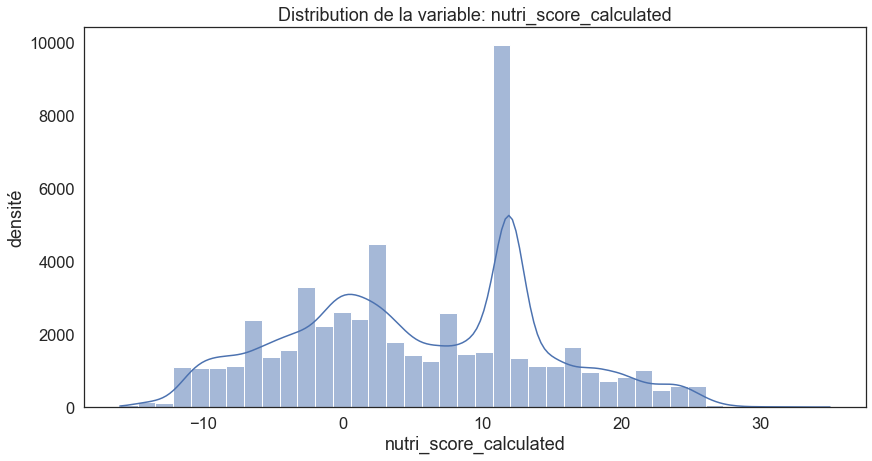

In [12]:
for c in df_cleaned.select_dtypes(include=["int64", "float64"]):
    fig, ax = plt.subplots(figsize=(14, 7))
    ax = sns.histplot(data=df_cleaned[c], bins=40, kde=True)
    ax.set(title="Distribution de la variable: " + c, xlabel=c, ylabel="densité")

### <img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Droite d'Henry.

In [13]:
import scipy as sp
from statsmodels.graphics.gofplots import qqplot

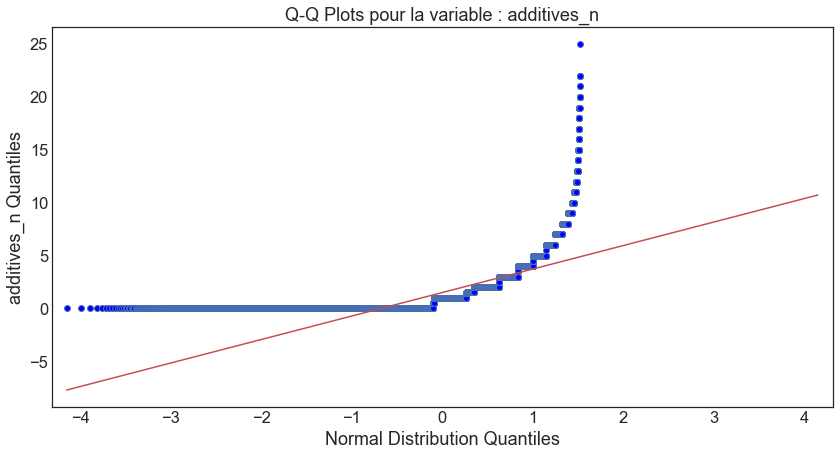

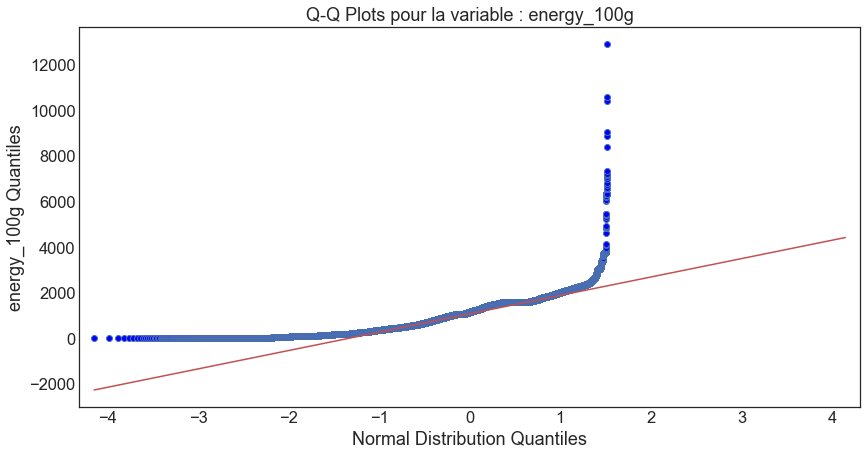

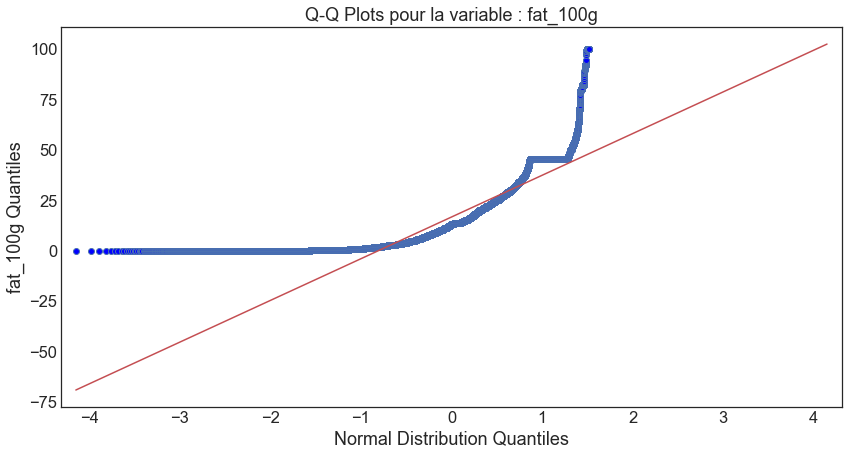

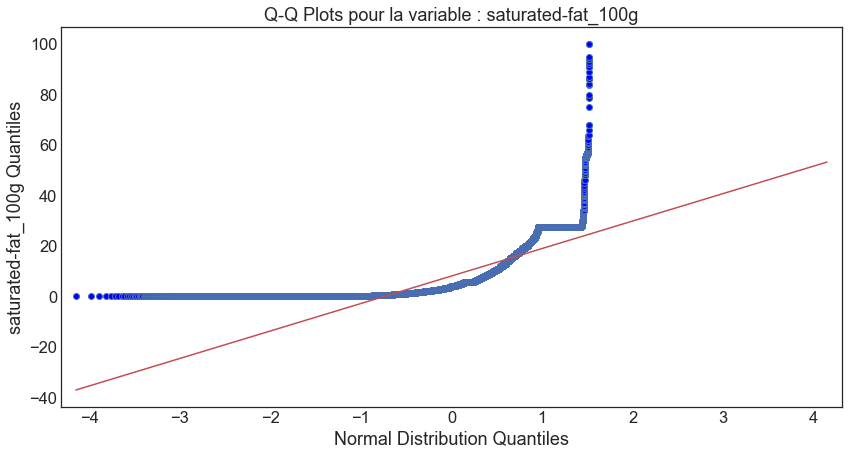

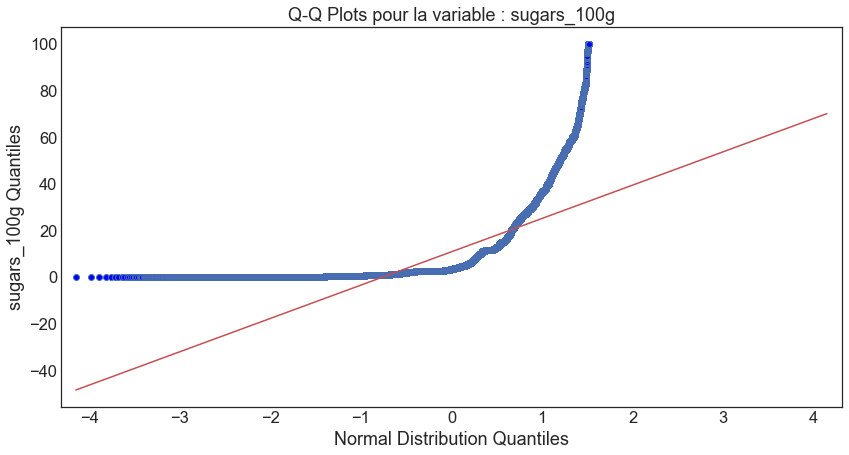

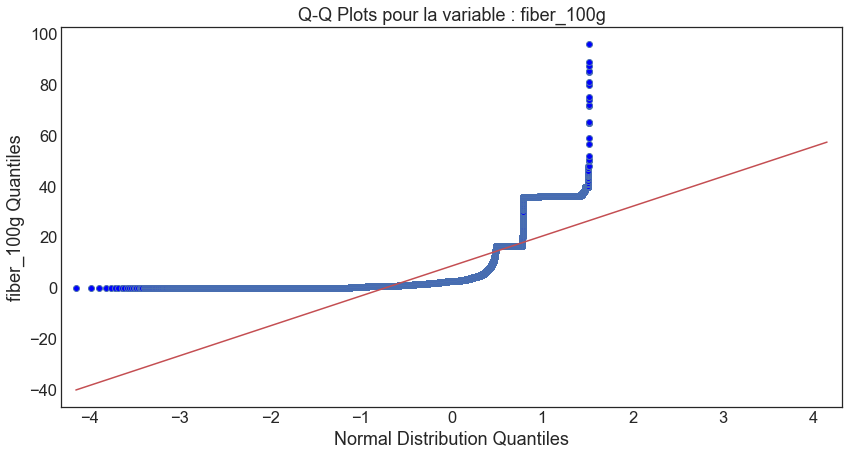

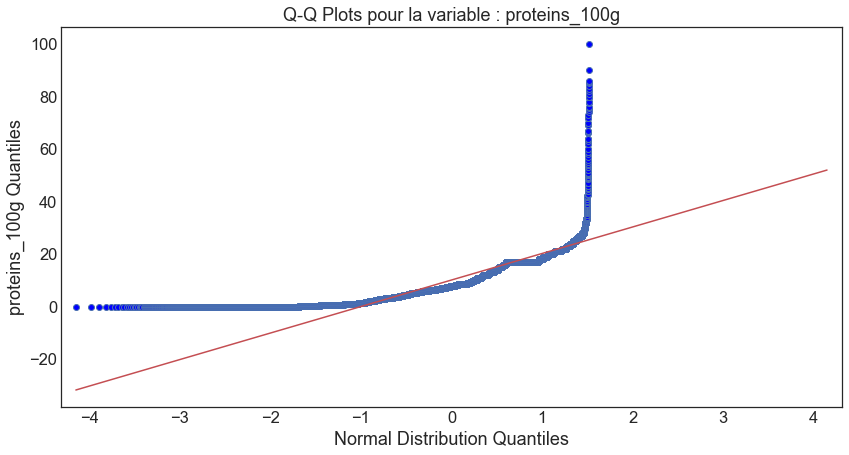

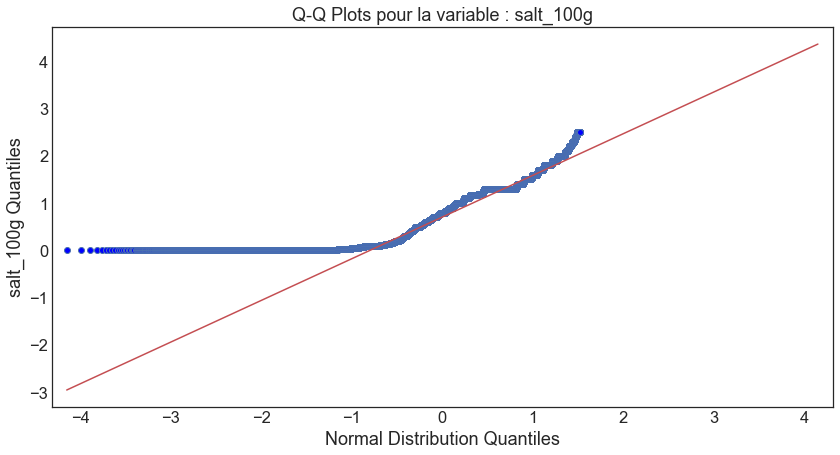

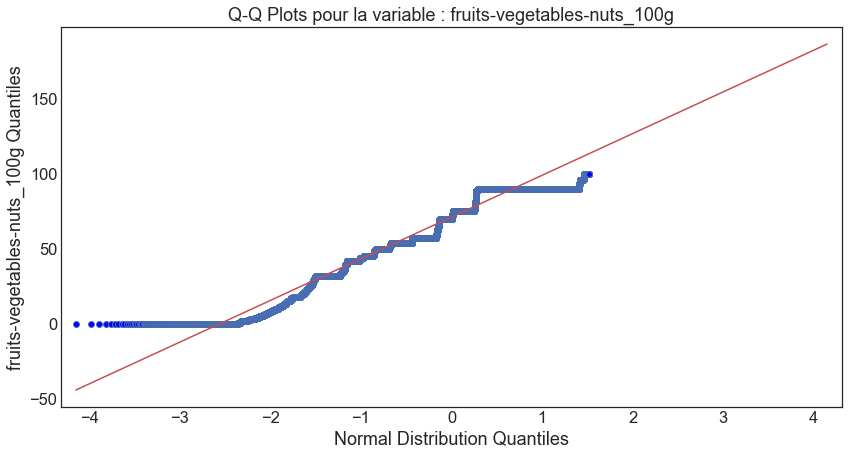

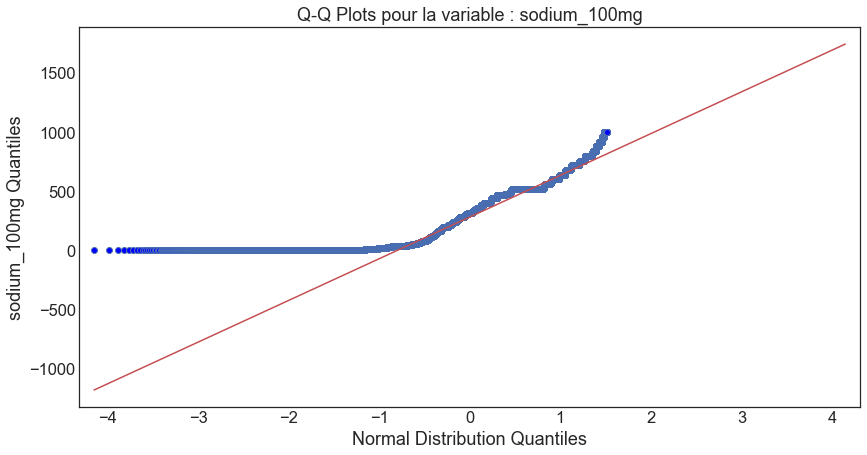

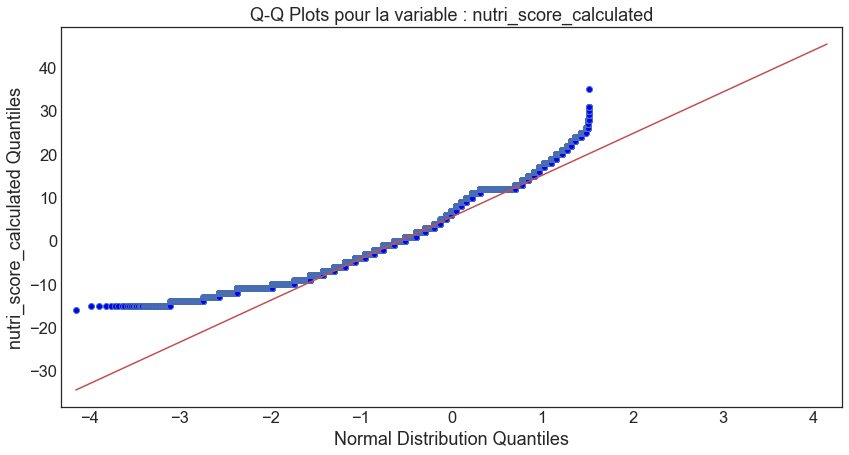

In [14]:
plt.style.use("seaborn-white")
sns.set_palette(sns.color_palette("Paired"))

for c in df_cleaned.select_dtypes(include=["int64", "float64"]):
    fig, ax = plt.subplots(figsize=(14, 7))

    qqplot(
        data=df_cleaned[c],
        dist=sp.stats.distributions.norm,
        line="q",
        ax=ax,
    )

    ax.set(
        title="Q-Q Plots pour la variable : " + c,
        ylabel=c + " Quantiles",
        xlabel="Normal Distribution Quantiles",
    )

- Seulement la variable `nutri_score_calculated` a une distribution qui se reproche d'une ` loi Normale` mais pas completement.

 ### <img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Test de normalité avec le test d' Anderson-Darling.

Hypothèse : <br>
**H0** : l'échantillon a une distribution gaussienne.<br>
**H1** : l'échantillon n'a pas de distribution gaussienne.<br>

source du code : [lien](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)

In [15]:
print(c)

nutri_score_calculated


In [16]:
from scipy.stats import anderson

for c in df_cleaned.select_dtypes(include=["int64", "float64"]):

    result = anderson(df_cleaned[c].dropna(), dist="norm")
    print(c)
    print("result=%.3f" % (result.statistic))

    p = 0
    for i in range(len(result.critical_values)):
        significance_level, critical_value = (
            result.significance_level[i],
            result.critical_values[i],
        )

        if result.statistic < result.critical_values[i]:
            print(
                f"résultat statistique au niveau {significance_level}% est de {result.statistic}% ==> Les données suivent une Loi Normale."
            )

        else:
            print(
                f"résultat statistique au niveau {significance_level}% est de {result.statistic}% ==> Les données ne suivent pas une Loi Normale."
            )

    print("-" * 80)

additives_n
result=5393.163
résultat statistique au niveau 15.0% est de 5393.1627714719% ==> Les données ne suivent pas une Loi Normale.
résultat statistique au niveau 10.0% est de 5393.1627714719% ==> Les données ne suivent pas une Loi Normale.
résultat statistique au niveau 5.0% est de 5393.1627714719% ==> Les données ne suivent pas une Loi Normale.
résultat statistique au niveau 2.5% est de 5393.1627714719% ==> Les données ne suivent pas une Loi Normale.
résultat statistique au niveau 1.0% est de 5393.1627714719% ==> Les données ne suivent pas une Loi Normale.
--------------------------------------------------------------------------------
energy_100g
result=488.080
résultat statistique au niveau 15.0% est de 488.080443261606% ==> Les données ne suivent pas une Loi Normale.
résultat statistique au niveau 10.0% est de 488.080443261606% ==> Les données ne suivent pas une Loi Normale.
résultat statistique au niveau 5.0% est de 488.080443261606% ==> Les données ne suivent pas une Loi No

- Selon le teste d'Anderson-Darling **aucune des variables** ne suit une distribution normale.
- Cela confirme la conclusion de l'analyse graphique avec le Q-Q Plot.

 ### <img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Test de normalité avec le test D’Agostino et Pearson’s

- Sachant que nous savons que nos données ne suivent une loi Normale.
- Nous allons procéder à un autre teste d'hypothèse pour des raisons d'apprentissage.<br>
<br>
Hypothèse : <br>
**H0** : l'échantillon a une distribution gaussienne.<br>
**H1** : l'échantillon n'a pas de distribution gaussienne.<br>

source code : [lien](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)

In [17]:
from scipy.stats import normaltest

for c in df_cleaned.select_dtypes(include=["int64", "float64"]):

    k2, p_value = normaltest(df_cleaned[c].dropna())
    print(c)

    alpha = 0.05
    print(f"p_value = {p_value}")

    if p_value < alpha:  # null hypothesis: x comes from a normal distribution
        print(
            "L'hypothèse nulle peut être rejetée, les données ne sont pas une Loi Normale"
        )
    else:
        print(
            "L'hypothèse nulle ne peut pas être rejetée, les données sont suivent une Loi Normale"
        )
    print("-" * 80)

additives_n
p_value = 0.0
L'hypothèse nulle peut être rejetée, les données ne sont pas une Loi Normale
--------------------------------------------------------------------------------
energy_100g
p_value = 0.0
L'hypothèse nulle peut être rejetée, les données ne sont pas une Loi Normale
--------------------------------------------------------------------------------
fat_100g
p_value = 0.0
L'hypothèse nulle peut être rejetée, les données ne sont pas une Loi Normale
--------------------------------------------------------------------------------
saturated-fat_100g
p_value = 0.0
L'hypothèse nulle peut être rejetée, les données ne sont pas une Loi Normale
--------------------------------------------------------------------------------
sugars_100g
p_value = 0.0
L'hypothèse nulle peut être rejetée, les données ne sont pas une Loi Normale
--------------------------------------------------------------------------------
fiber_100g
p_value = 0.0
L'hypothèse nulle peut être rejetée, les données ne

- Le résultat du test D’Agostino et Pearson’s **confirme** la conclusion du **test d'Anderson** et l'analyse graphique **Q-Q Plot**.

### <img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Détection des valeurs aberrantes.

- Pour détecter la présence ou non de valeurs aberrantes, nous allons utiliser **la méthode Tukey**, car : 
    - Des indicateurs robustes aux valeurs aberrantes (par exemple, IQR, clôture intérieure et extérieure), ce qui signifie que la recherche d'une valeur aberrante est indépendante de toutes les autres valeurs aberrantes.
    - Cette méthode ne nécessite pas une distribution normale des données.

### <img src='./images/Tukey outliers method.png' width=600px align="center"/>

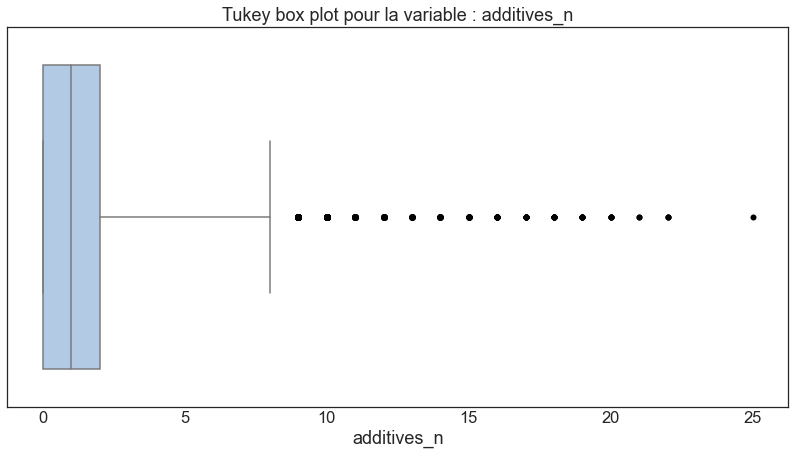

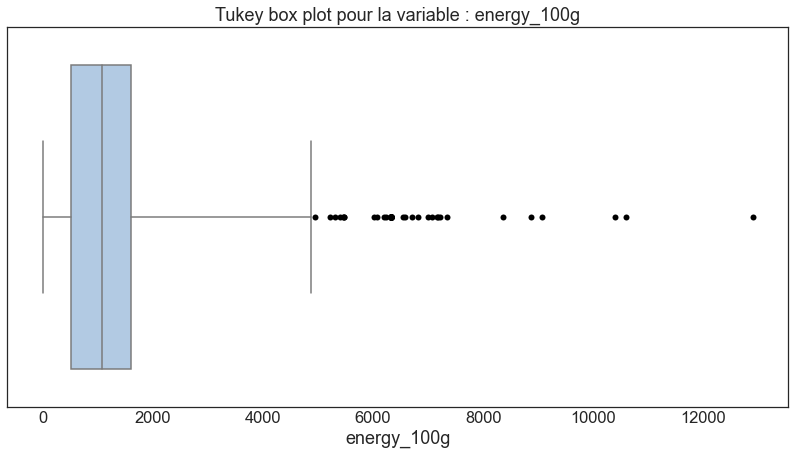

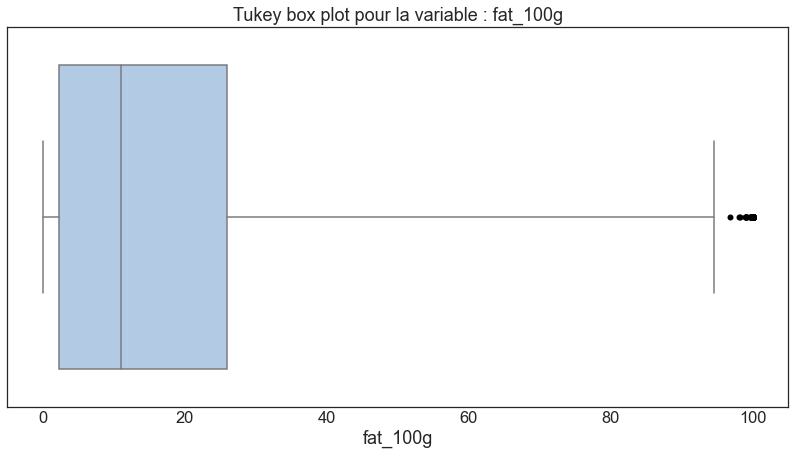

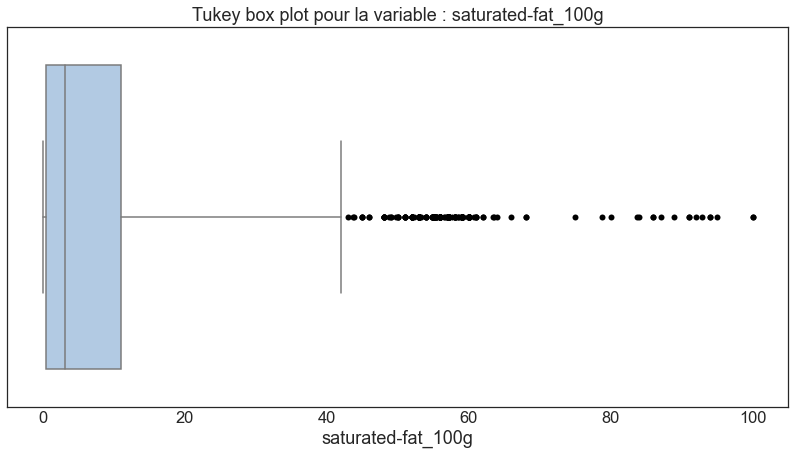

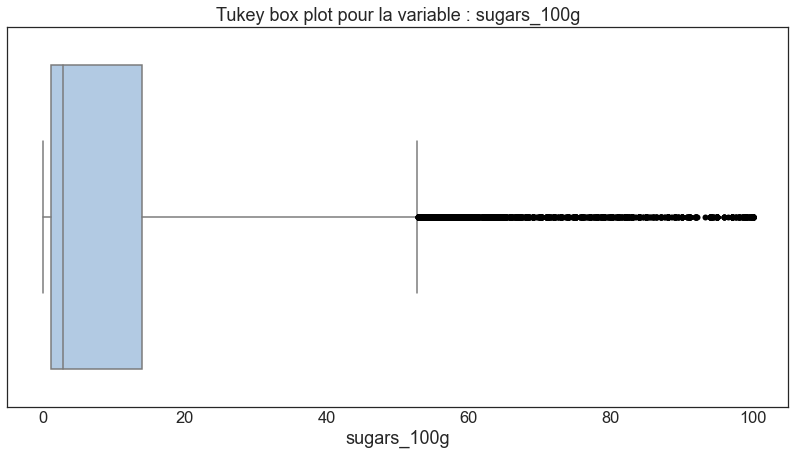

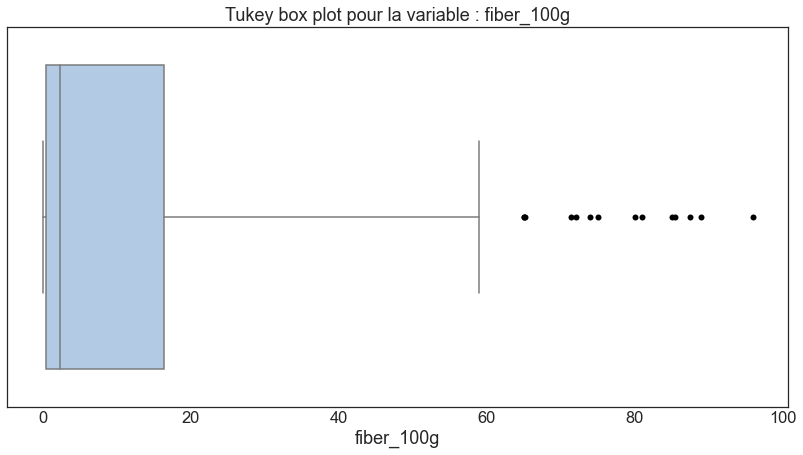

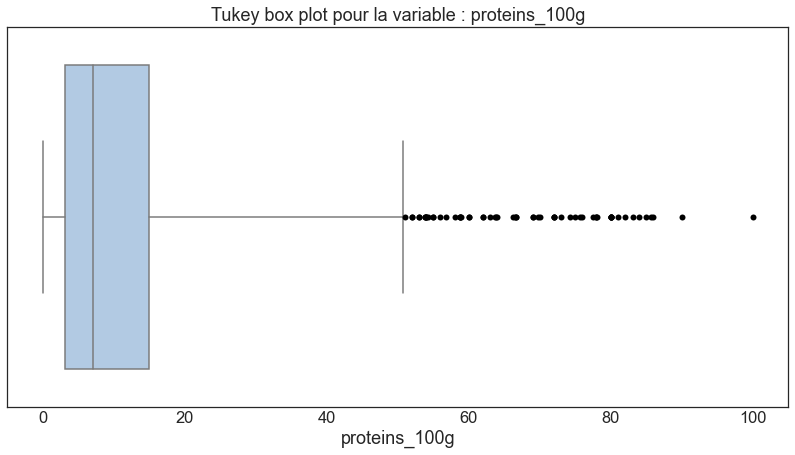

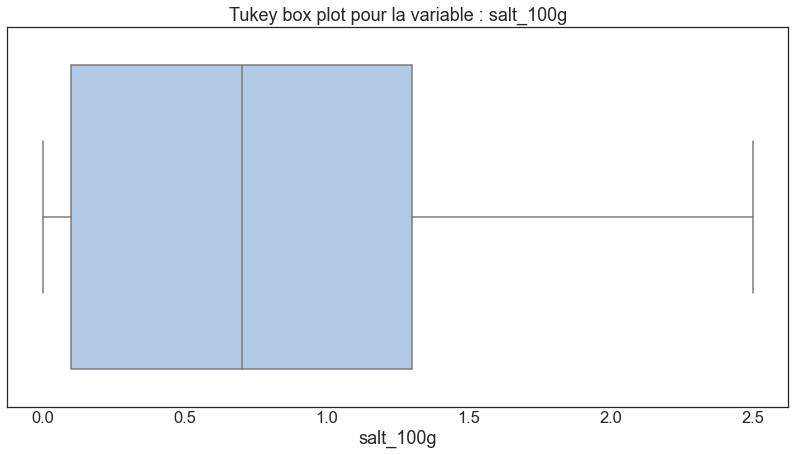

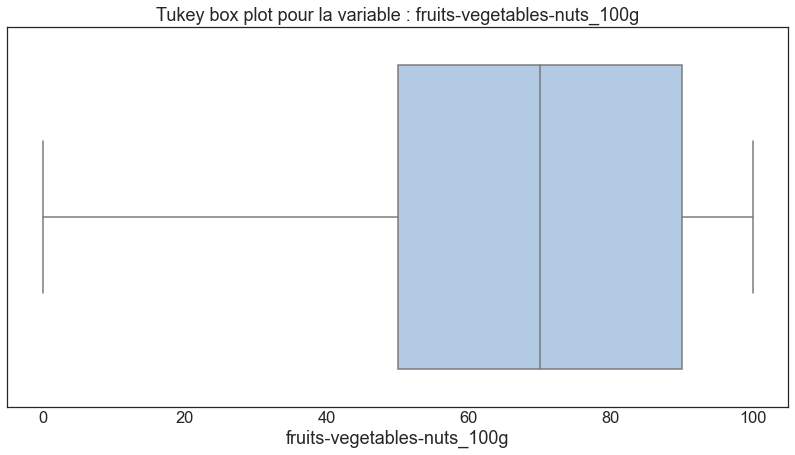

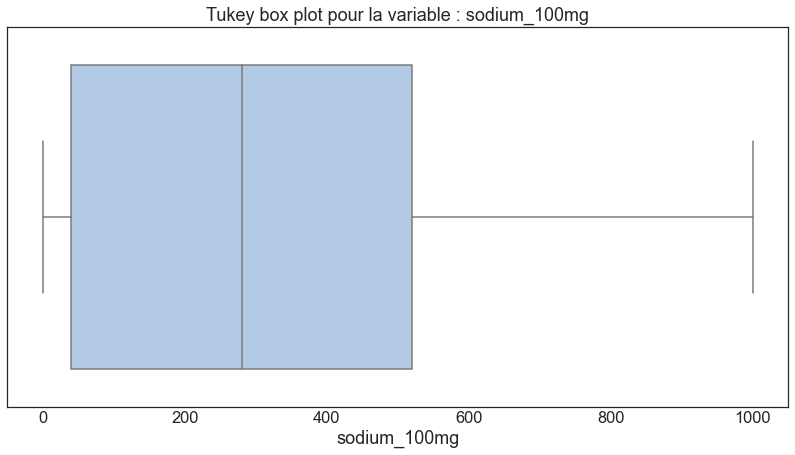

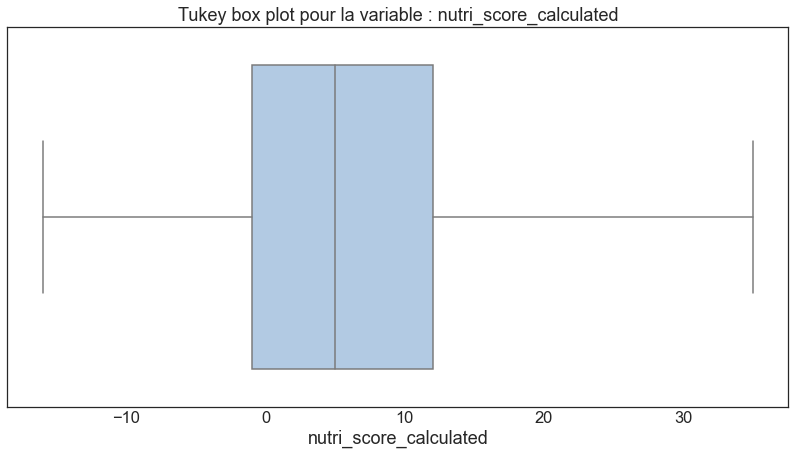

In [18]:
for c in df_cleaned.select_dtypes(include=["int64", "float64"]):

    fig, ax = plt.subplots(figsize=(14, 7))

    ax = sns.boxplot(
        data=df_cleaned,
        x=c,
        orient="h",
        palette="pastel",
        saturation=0.6,
        whis=3,
        flierprops=dict(
            marker="o",
            markerfacecolor="black",
            markersize=6,
            linestyle="none",
            markeredgecolor="None",
        ),
    )

    ax.set(title="Tukey box plot pour la variable : " + c)

- Le tableau suivant, synthétise les résultats de l'analyse **boxplot** avec **la méthode Tukey** :

| Variable | Valeurs atypiques détectés?| Valeurs aberrantes détectés?|
|:-|:-|:-|
|`additives_n`|<font color=red>**Oui**|<font color=red>**Oui**|
|`energy_100g`|<font color=red>**Oui**|<font color=red>**Oui**|
|`fat_100g`|<font color=green>**Oui**|<font color=green>**Non**|
|`saturated-fat_100g`|<font color=green>**Oui**|<font color=green>**Non**|
|`sugars_100g`|<font color=green>**Oui**|<font color=green>**Non**|
|`fiber_100g`|<font color=green>**Oui**|<font color=green>**Non**|
|`proteins_100g`|<font color=green>**Oui**|<font color=green>**Non**|
|`salt_100g`|<font color=green>**Non**|<font color=green>**Non**|
|`sodium_100mg`|<font color=green>**Non**|<font color=green>**Non**|
|`fruits-vegetables-nuts_100g`|<font color=green>**Non**|<font color=green>**Non**|
|`nutri_score_calculated`|<font color=green>**Non**|<font color=green>**Non**|
   

<img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Création d'une fonction pour remplacer les valeurs aberrantes par des valeurs NaN.

In [19]:
Liste_colums_outliers = [
    "additives_n",
    "energy_100g",
]

In [20]:
# Tukey's method
def tukeys_method(dataframe, liste):
    """
    Cette fonction calcul le nombre d'outliers en utilisant la méthode de Tukey.
    Input : dataframe.
    Output: modified dataframe
    """
    # Liste des colonnes avec des outliers univariés
    Liste_colums_outliers = liste

    for column in Liste_colums_outliers:

        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1

        # calcul des limites d'outer_fence
        outer_fence_low = Q1 - 3 * IQR
        outer_fence_high = Q3 + 3 * IQR

        # calcul du nombre d'outliers détectés
        outlier_detected_before = np.sum(dataframe[column] < outer_fence_low) + np.sum(
            dataframe[column] > outer_fence_high
        )

        # Afficher le nombre d'outliers détectés
        print(f"{column} Nbr d'outliers détectés :", outlier_detected_before)

        # Remplacer les outliers avec une valeur NaN.
        dataframe.loc[
            dataframe[column] < outer_fence_low, ["nutri_grade_calculated"]
        ] = float("nan")
        dataframe.loc[
            dataframe[column] < outer_fence_low, ["nutri_score_calculated"]
        ] = float("nan")
        dataframe.loc[
            dataframe[column] > outer_fence_high, ["nutri_grade_calculated"]
        ] = float("nan")
        dataframe.loc[
            dataframe[column] > outer_fence_high, ["nutri_score_calculated"]
        ] = float("nan")
        dataframe.loc[dataframe[column] < outer_fence_low] = float("nan")
        dataframe.loc[dataframe[column] > outer_fence_high] = float("nan")

        # calcul du nombre d'outliers détectés après imputation des NaN
        outlier_detected_after = np.sum(dataframe[column] < outer_fence_low) + np.sum(
            dataframe[column] > outer_fence_high
        )

        # Afficher le nombre d'outliers détectés après imputation des NaN
        print(
            f"{column} Nbr d'outliers détectés APRES transformation en NaN :",
            outlier_detected_after,
        )
        print("-" * 80)

    return None

In [21]:
tukeys_method(df_cleaned, Liste_colums_outliers)

additives_n Nbr d'outliers détectés : 1084
additives_n Nbr d'outliers détectés APRES transformation en NaN : 0
--------------------------------------------------------------------------------
energy_100g Nbr d'outliers détectés : 98
energy_100g Nbr d'outliers détectés APRES transformation en NaN : 0
--------------------------------------------------------------------------------


<img src='./images/logo_OC.png' width=20px align="left"/> &emsp; **Vérification** de la **correction** des **valeurs aberrantes** sur les variables :
`additives_n` et `energy_100g`

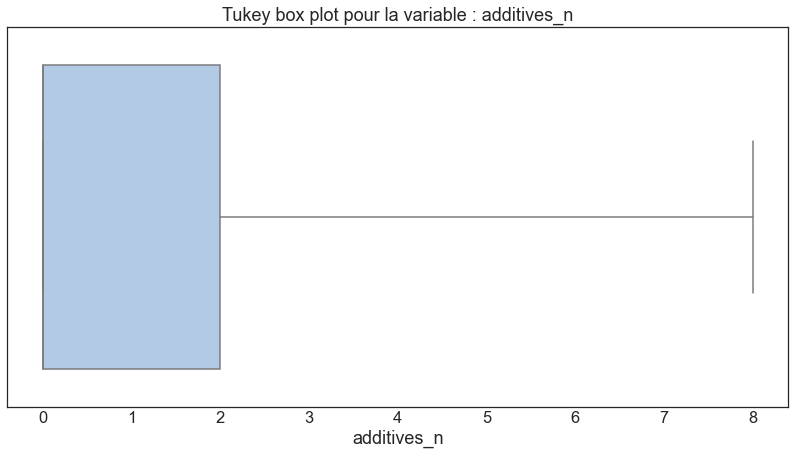

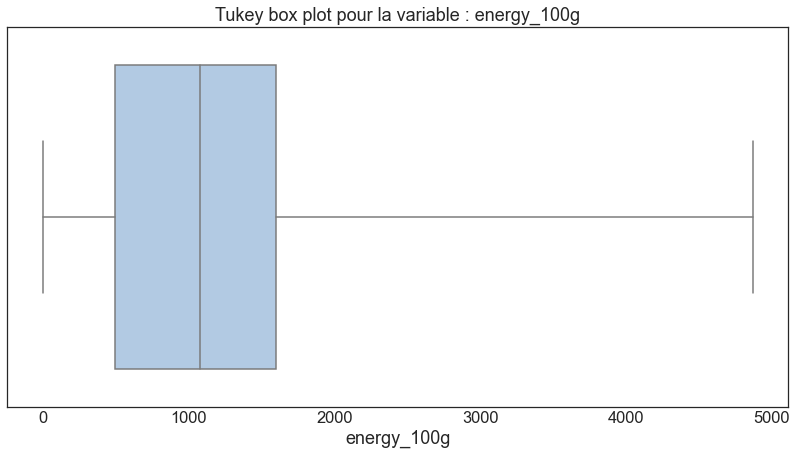

In [22]:
for c in Liste_colums_outliers:

    fig, ax = plt.subplots(figsize=(14, 7))

    ax = sns.boxplot(
        data=df_cleaned,
        x=c,
        orient="h",
        palette="pastel",
        saturation=0.6,
        whis=3,
        flierprops=dict(
            marker="o",
            markerfacecolor="black",
            markersize=6,
            linestyle="none",
            markeredgecolor="None",
        ),
    )

    ax.set(title="Tukey box plot pour la variable : " + c)

### <img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Traitement des outliers (valeurs aberrantes).

 <img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Importation des fonctions perso : 
 - `numerical_Values_Imputation`  pour imputer les valeurs NaN avec KNNImputer().
 - `main_Nutri_Score` pour calculer le nutri-score après imputation des valeurs NaN.
 - `main_Nutri_Grade` pour calculer le nutri-grade après imputation des valeurs NaN.

In [23]:
import Mohamed_OC_Project_03_Personnal_Module
from sklearn.impute import KNNImputer

In [24]:
# # from PSanté_01_notebooknettoyage import numerical_Values_Imputation
# from PSanté_01_notebooknettoyage import main_Nutri_Score

In [25]:
Personal_KNNImputer = Mohamed_OC_Project_03_Personnal_Module.numerical_Values_Imputation
main_Nutri_Score = Mohamed_OC_Project_03_Personnal_Module.main_Nutri_Score
main_Nutri_Grade = Mohamed_OC_Project_03_Personnal_Module.main_Nutri_Grade

In [26]:
index_list = [
    "code",
    "url",
    "product_name",
    "pnns_groups_1",
    "pnns_groups_2",
    "manufacturing_places",
    "nutri_score_calculated",
    "nutri_grade_calculated",
]

In [27]:
df_no_outliers = Personal_KNNImputer(df_cleaned, index_list)

Le nombre de valeurs manquantes trouvées AVANT imputation :  50170
Le nombre de valeurs manquantes trouvées APRES imputation :  0
Imputation des valeurs manquantes réalisée avec succès


 <img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Imputation des valeurs NaN présentes dans la variable `nutri-score`

In [28]:
df_no_outliers.loc[
    df_no_outliers["nutri_score_calculated"].isna(), ["nutri_score_calculated"]
] = df_no_outliers[
    [
        "energy_100g",
        "sugars_100g",
        "saturated-fat_100g",
        "fat_100g",
        "sodium_100mg",
        "proteins_100g",
        "fiber_100g",
        "fruits-vegetables-nuts_100g",
        "pnns_groups_1",
    ]
].apply(
    lambda x: main_Nutri_Score(*x), axis=1
)

 <img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Imputation des valeurs NaN présentes dans la variable `nutri-grade`

In [29]:
df_no_outliers.loc[
    df_no_outliers["nutri_grade_calculated"].isna(), ["nutri_grade_calculated"]
] = df_no_outliers[["pnns_groups_1", "pnns_groups_2", "nutri_score_calculated"]].apply(
    lambda x: main_Nutri_Grade(*x), axis=1
)

 <img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Boxplot **AVANT** vs **APRES** imputation des valeurs aberrantes.

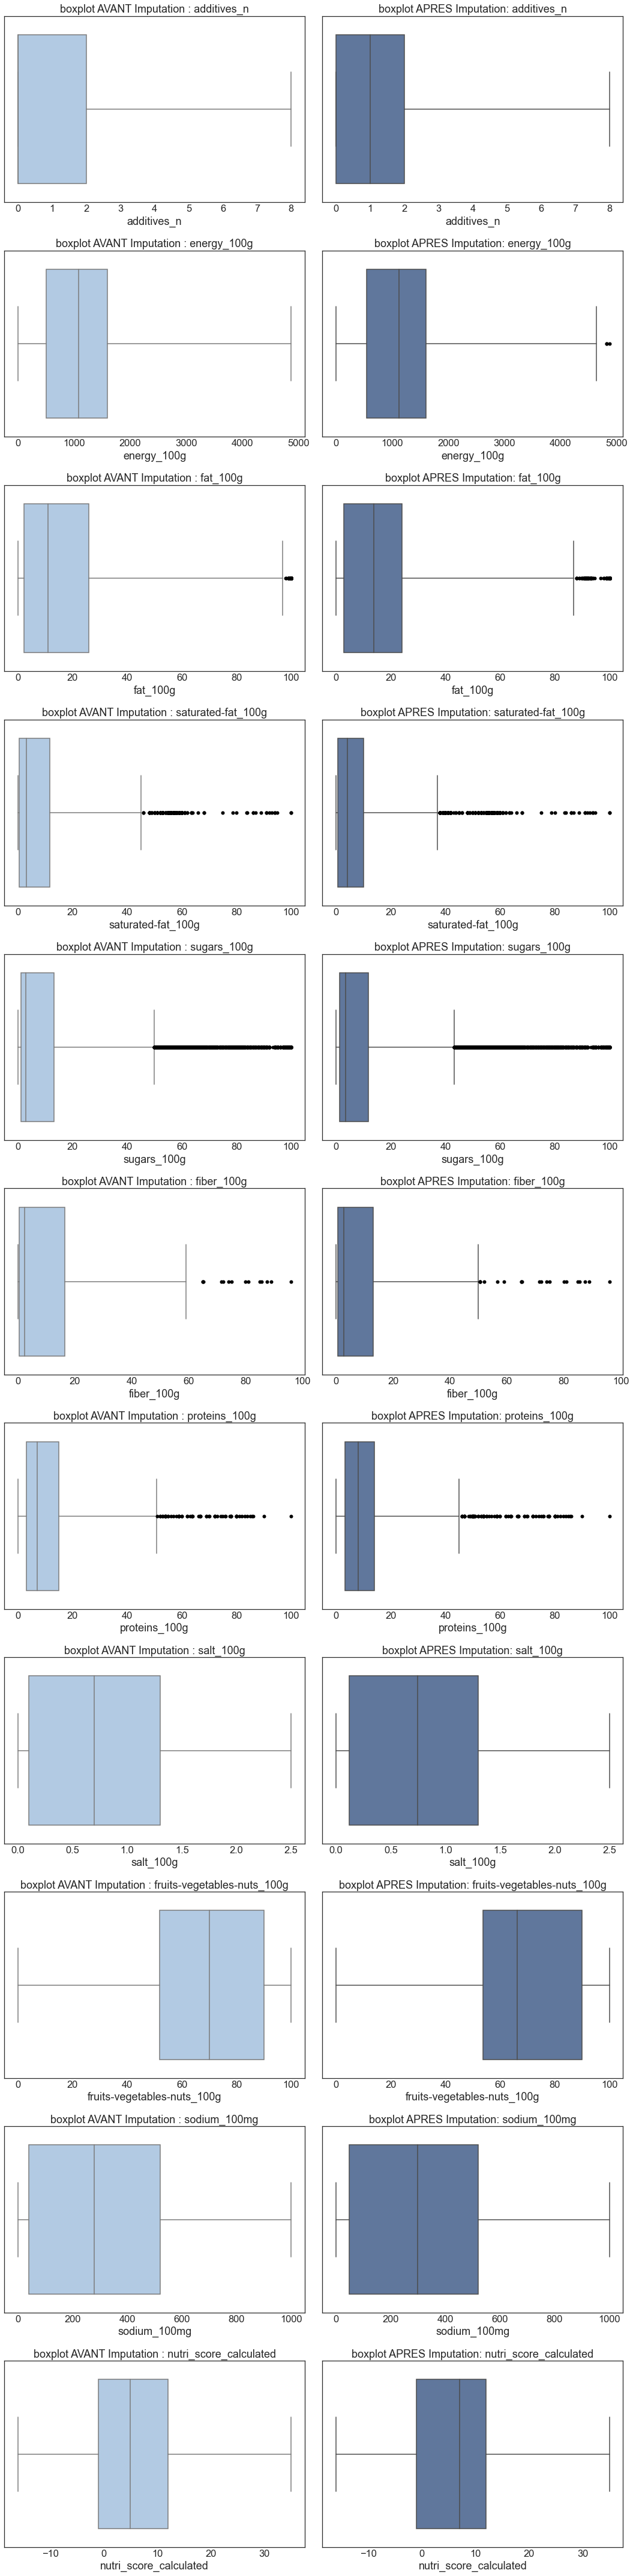

In [30]:
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(15, 60))
i = 0

for c in df_cleaned.select_dtypes(include=["int64", "float64"]).columns:
    # Boxplot univariate outliers BEFORE imputation

    sns.boxplot(
        data=df_cleaned,
        x=c,
        orient="h",
        palette="pastel",
        saturation=0.6,
        whis=3,
        flierprops=dict(
            marker="o",
            markerfacecolor="black",
            markersize=6,
            linestyle="none",
            markeredgecolor="None",
        ),
        ax=axes[i, 0],
    )
    fig.tight_layout()
    axes[i, 0].set(title="boxplot AVANT Imputation : " + c)

    # Boxplot univariate outliers AFTER Imputation
    sns.boxplot(
        data=df_no_outliers,
        x=c,
        orient="h",
        palette="deep",
        saturation=0.6,
        whis=3,
        flierprops=dict(
            marker="o",
            markerfacecolor="black",
            markersize=6,
            linestyle="none",
            markeredgecolor="None",
        ),
        ax=axes[i, 1],
    )
    fig.tight_layout()
    axes[i, 1].set(title="boxplot APRES Imputation: " + c)

    i += 1

In [31]:
df_no_outliers.isna().sum()

code                           5017
url                            5017
product_name                   5320
pnns_groups_1                  5018
pnns_groups_2                  5017
manufacturing_places           5017
nutri_score_calculated            0
nutri_grade_calculated            0
additives_n                       0
energy_100g                       0
fat_100g                          0
saturated-fat_100g                0
sugars_100g                       0
fiber_100g                        0
proteins_100g                     0
salt_100g                         0
fruits-vegetables-nuts_100g       0
sodium_100mg                      0
dtype: int64

### <img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Bargraphs pour les variables de types catégorie.

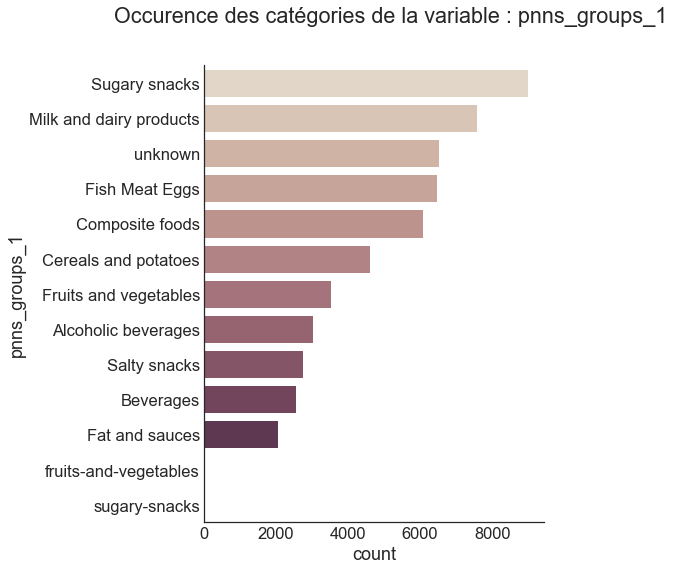

In [32]:
ax = sns.catplot(
    data=df_no_outliers,
    y="pnns_groups_1",
    kind="count",
    orient="v",
    palette="ch:.25",
    height=8,
    aspect=1,
    order=df_no_outliers["pnns_groups_1"]
    .value_counts()
    .sort_values(ascending=False)
    .index,
)

ax.fig.suptitle("Occurence des catégories de la variable : pnns_groups_1", x=0.7, y=1)

ax.fig.tight_layout()

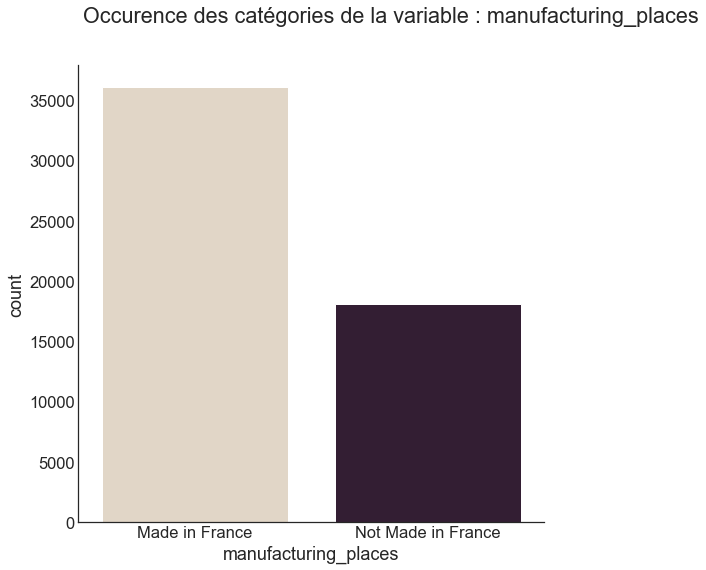

In [33]:
ax = sns.catplot(
    data=df_no_outliers,
    x="manufacturing_places",
    kind="count",
    palette="ch:.25",
    height=8,
    aspect=1,
    order=df_no_outliers["manufacturing_places"]
    .value_counts()
    .sort_values(ascending=False)
    .index,
)

ax.fig.suptitle(
    "Occurence des catégories de la variable : manufacturing_places", x=0.7, y=1
)

ax.fig.tight_layout()

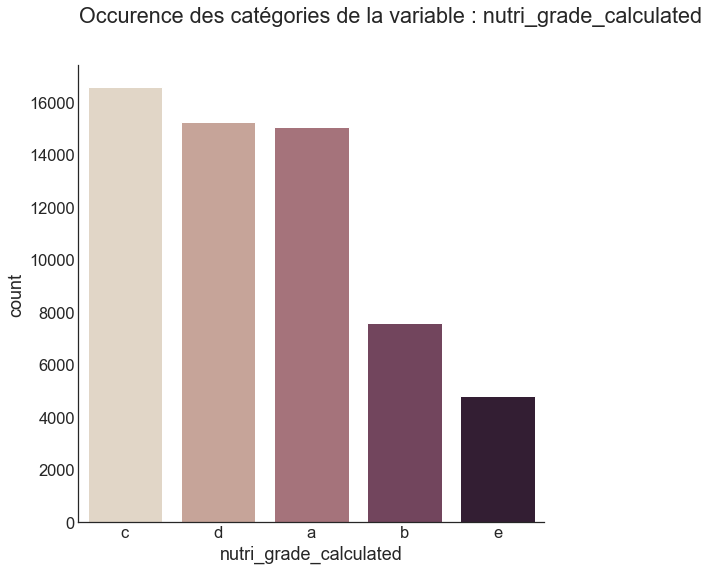

In [34]:
ax = sns.catplot(
    data=df_no_outliers,
    x="nutri_grade_calculated",
    kind="count",
    palette="ch:.25",
    height=8,
    aspect=1,
    order=df_no_outliers["nutri_grade_calculated"]
    .value_counts()
    .sort_values(ascending=False)
    .index,
)

ax.fig.suptitle(
    "Occurence des catégories de la variable : nutri_grade_calculated", x=0.7, y=1
)

ax.fig.tight_layout()

*********
# <font color=#7451eb> Chapitre 2 : Analyse bivariée</font>
*********

### <img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Analyse de la rélation entre les  variables quantitatives. 

<img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Générer un pairplot entre les différentes variables. 

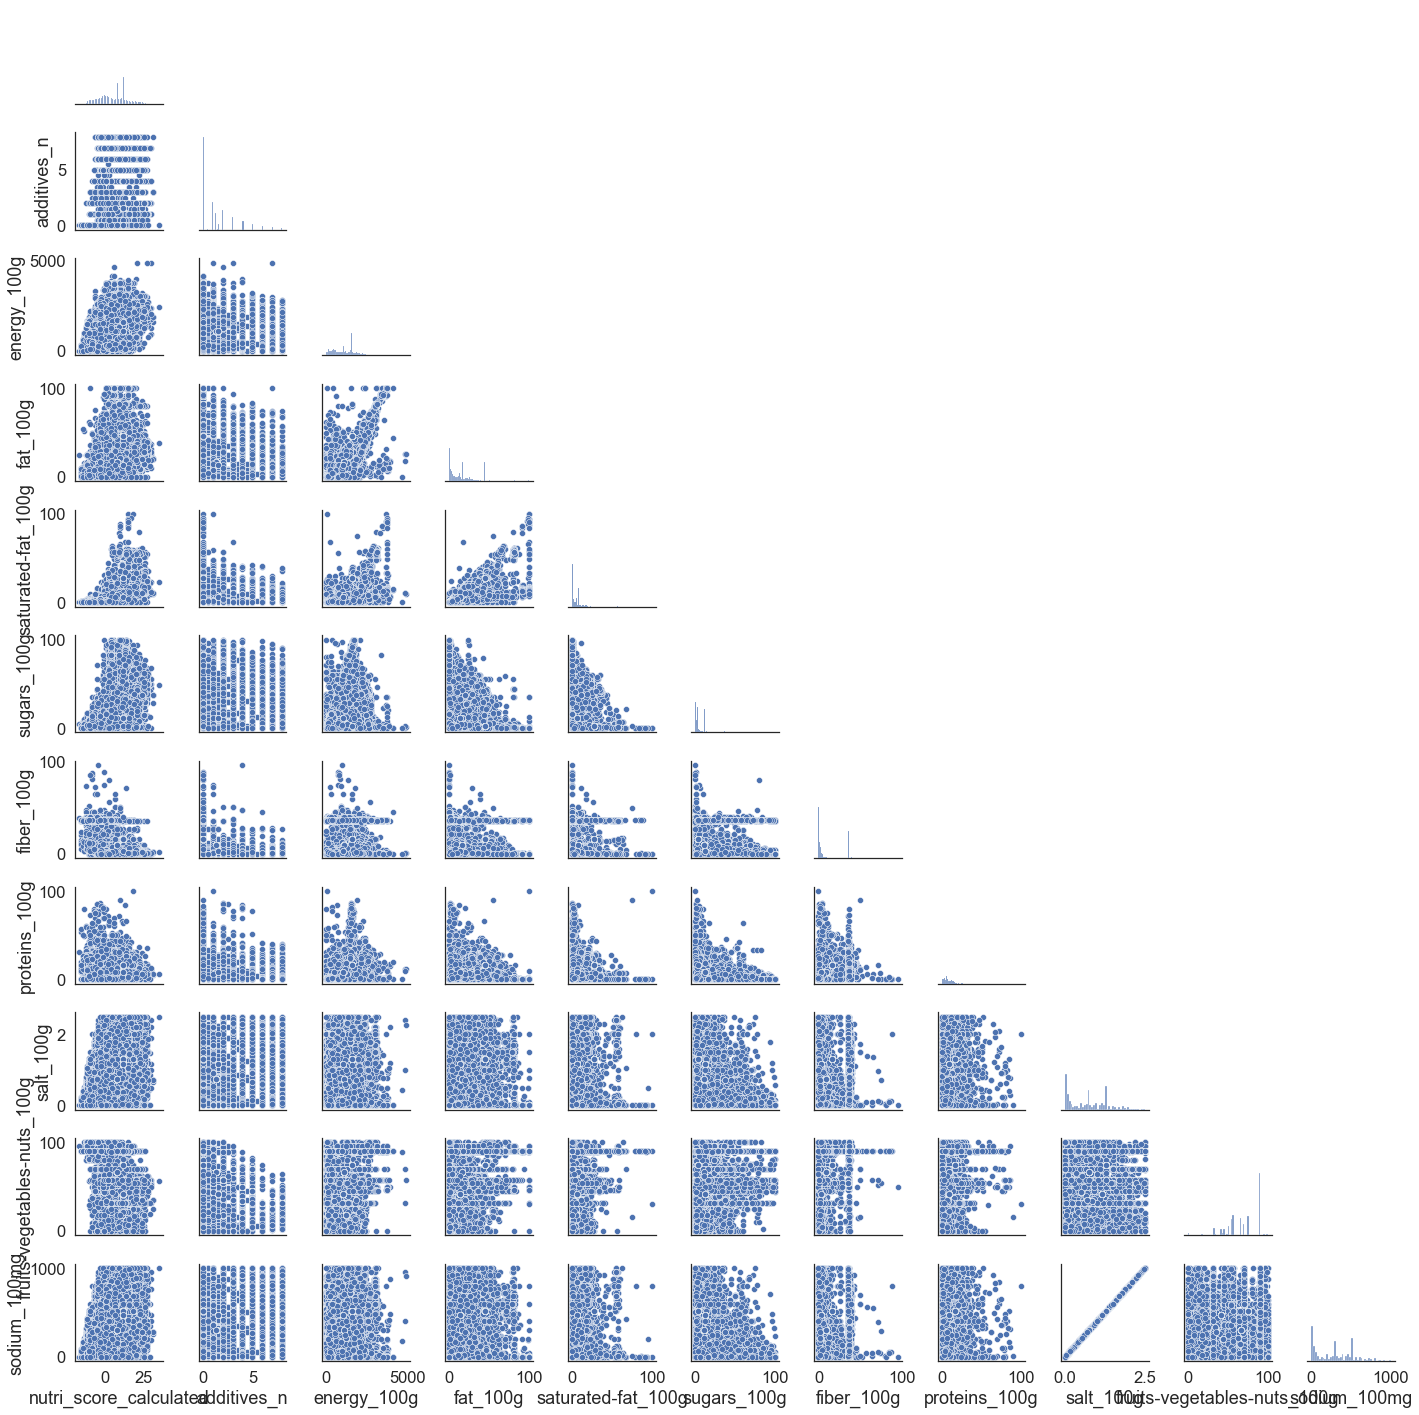

In [35]:
sns.set(style="white", font_scale=1.5)

ax = sns.pairplot(
    data=df_no_outliers.select_dtypes(include=["int64", "float64"]),
    corner=True,
    kind="scatter",
)

ax.fig.set_size_inches(20, 20)

ax.fig.tight_layout()

Vu le **nombre important** de **variable**, le graph **pairplot** n'est **pas** très **lisible** et donc **ne permet pas** facilement de tirer des **conclusions** sur les** les dépendances** entre les  **variables**.

<img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Matrice de corrélation

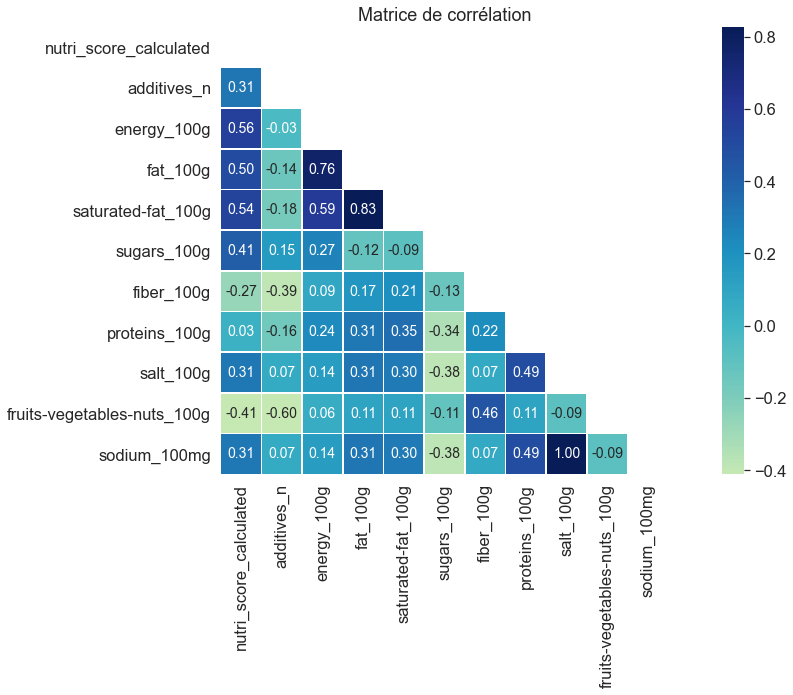

In [36]:
# Generer la matrice de corrélation
corr = df_no_outliers.select_dtypes(include=["int64", "float64"]).corr()

# Créer un masque pour cacher la partie supérieure du triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(16, 10))

ax = sns.heatmap(
    corr,
    mask=mask,
    cmap="YlGnBu",
    center=0,
    square=True,
    linewidths=0.6,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 14},
    robust=True,
)

ax.set(title="Matrice de corrélation")

ax.figure.tight_layout()

- Le tableau suivant, synthétise l'étude de la présence ou non d'une relation linéaire entre les différentes variables quantitatives.
- Nous allons garder uniquement les fortes corrélation positives ou négatives (**Pearson** correlation **>= 0.5** ou **<= -0.5**)

|Variable|Type de corrélation avec variable|
|:----|:----|
|`additives_n`|**forte négative** avec **fruits-vegetables-nuts**.<br>|
|`energy_100g`|**forte positive** avec **fat_100g**.<br>**positive** avec **saturated-fat_100g**<br>**positive** avec **nutri_score_calculated**<br>|
|`fat_100g`|**forte positive** avec **saturated-fat_100g**.<br>**positive** avec **nutri_score_calculated**.<br>|
|`saturated-fat_100g`|**positive** avec **nutri_score_calculated**.<br>|
|`sugars_100g`|**positive** avec **nutri_score_calculated**.<br>|
|`salt_100g`|**forte positive** avec **sodium_100m**.<br>|


### <img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Analyse de la rélation entre les  variables qualitatives. 

- Le tableau de contingence permet d'estimer la dépendance entre deux variables qualitatives.

<img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Création d'une fonction pour générer un tableau de contingence entre 2 variables qualitatives.

In [37]:
def contingence_table(variable_1, variable_2):
    """
    Cette fonction, étude la rélation entre 2 variable qualitatives.
    Elle calcule un tableau de contingence et retourn un Heatmap qui represente la rélatin entre les 2 variables.
    """

    X = variable_1
    Y = variable_2

    fig, ax = plt.subplots(figsize=(12, 12))

    data_crosstab = pd.crosstab(
        index=df_no_outliers[X], columns=df_cleaned[Y], normalize=True
    )

    mask = np.triu(np.ones_like(data_crosstab, dtype=bool), k=1)

    cmap = sns.cubehelix_palette(light=1, as_cmap=True)

    ax = sns.heatmap(
        data_crosstab,
        mask=mask,
        cmap=cmap,
        square=True,
        linewidths=0.6,
        annot=True,
        fmt=".2f",
        annot_kws={"size": 12},
        robust=True,
        cbar_kws={"shrink": 0.6},
    )

    ax.set(title="Tableau de contingence des variables : " + X + " et " + Y)
    return

    ax.fig.tight_layout()

<img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Tableau de contingence entre `pnns_groups_1` et `nutriscore_grade_calculated`

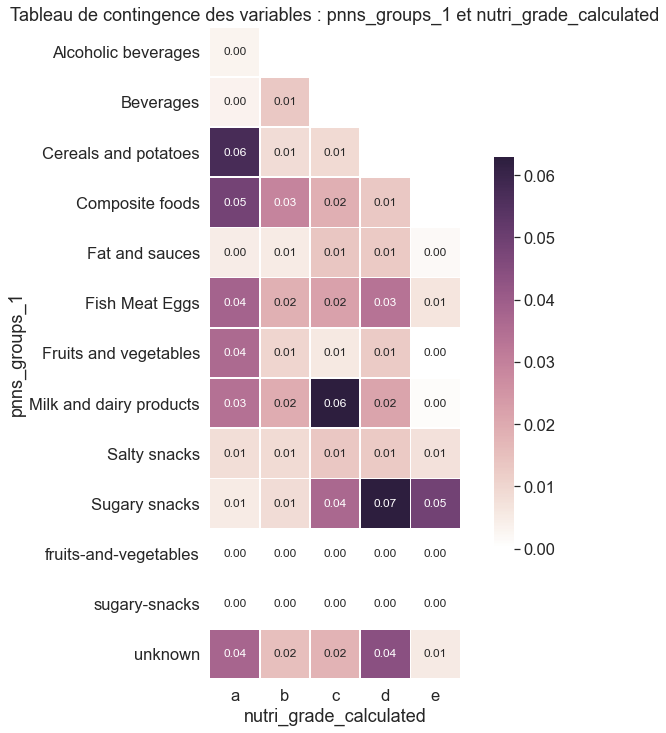

In [38]:
contingence_table("pnns_groups_1", "nutri_grade_calculated")

<img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Tableau de contingence entre `pnns_groups_1` et `manufacturing_places`

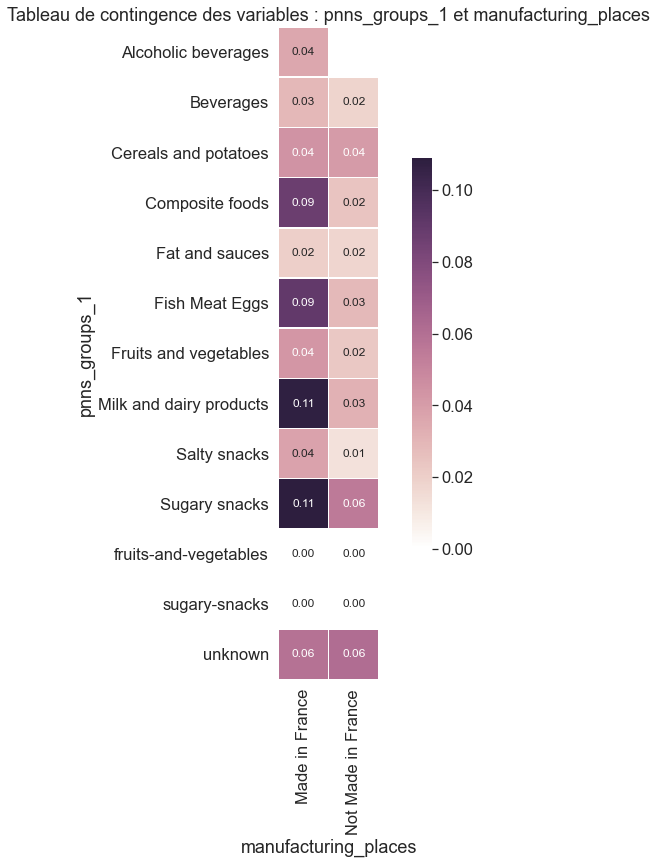

In [39]:
contingence_table("pnns_groups_1", "manufacturing_places")

<img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Tableau de contingence entre `manufacturing_places` et `nutriscore_grade_calculated`

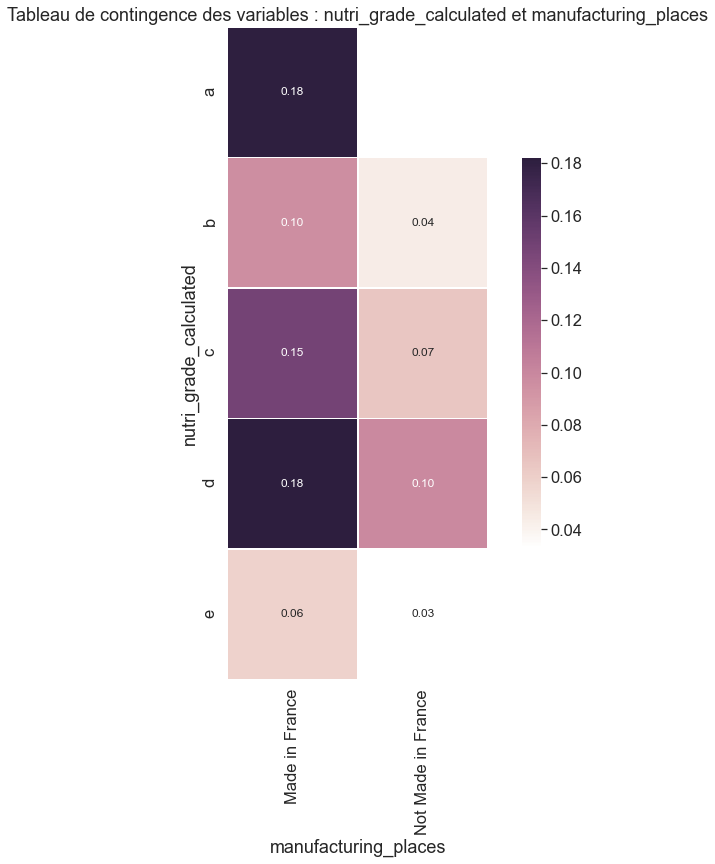

In [40]:
contingence_table("nutri_grade_calculated", "manufacturing_places")

*********
# <font color=#7451eb> Chapitre 3 : Analyse multivarié</font>
*********

### <img src='./images/logo_OC.png' width=20px align="left"/> &emsp;  Analyse en composantes principales.

https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5345201-tp-realisez-une-acp

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [42]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(
    df_no_outliers.select_dtypes(include=["int64", "float64"])
)

<img src='./images/logo_OC.png' width=20px align="left"/> &emsp;  Calcul de la variance et du std.

In [43]:
np.round(np.var(scaled_data), 1), np.round(np.var(np.std(scaled_data)), 1)

(1.0, 0.0)

<img src='./images/logo_OC.png' width=20px align="left"/> &emsp;  Réduction de dimensions.

In [44]:
# Initialisation du PCA.
pca = PCA()
X_pca = pca.fit_transform(scaled_data)
features = df_no_outliers.select_dtypes(include=["int64", "float64"]).columns

In [45]:
i = 1
for var in pca.explained_variance_ratio_:
    print(f"PC {i} - variance {round(var *100, 2)}%")
    i += 1

PC 1 - variance 32.85%
PC 2 - variance 22.31%
PC 3 - variance 18.51%
PC 4 - variance 6.83%
PC 5 - variance 5.57%
PC 6 - variance 5.38%
PC 7 - variance 3.92%
PC 8 - variance 2.85%
PC 9 - variance 0.94%
PC 10 - variance 0.83%
PC 11 - variance 0.0%


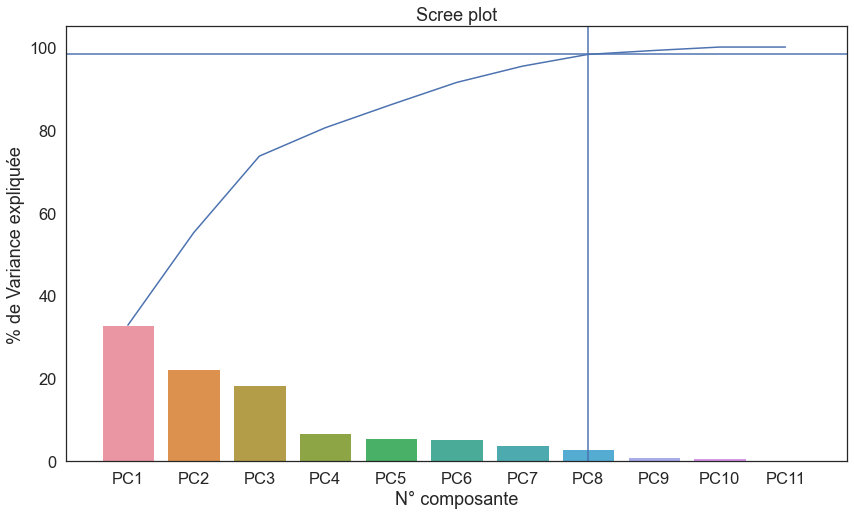

In [46]:
i = 1
pc_list = []
var_list = []
for var in pca.explained_variance_ratio_.tolist():
    #     print(f"PC{i} - variance expliquée : {round(var * 100,1)}")
    pc_list.append("PC" + str(i))
    var_list.append(var * 100)
    i += 1

fig, ax = plt.subplots(figsize=(14, 8))

ax = sns.barplot(
    x=pc_list,
    y=var_list,
)

ax = sns.lineplot(
    x=pc_list,
    y=np.cumsum(var_list),
)

ax.set(
    title="Scree plot",
    xlabel="N° composante",
    ylabel="% de Variance expliquée",
)

ax.axhline(y=98.4)
ax.axvline(x=7)

<img src='./images/logo_OC.png' width=20px align="left"/> &emsp;  Cercle des corrélations.

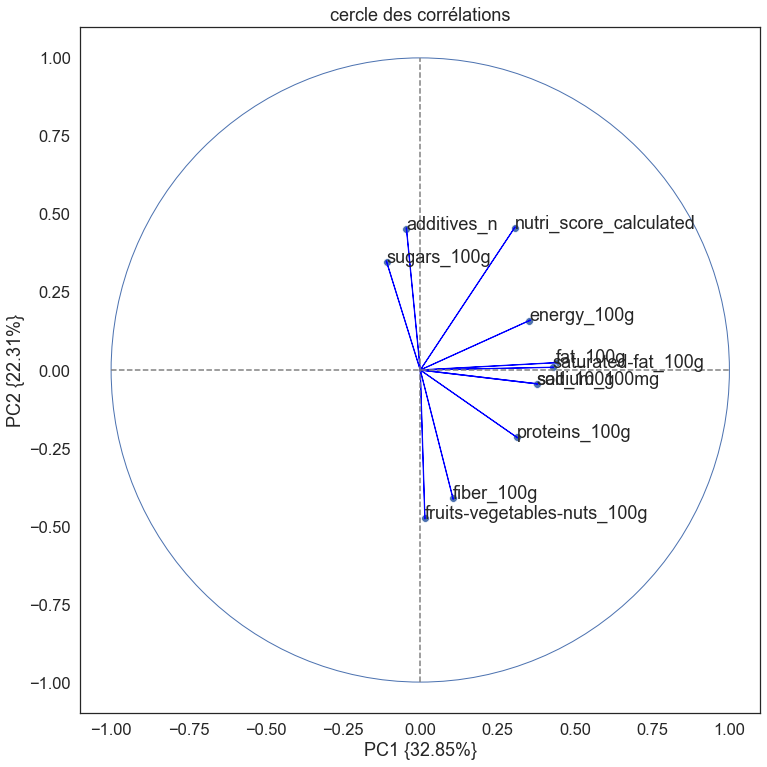

In [47]:
fig, ax = plt.subplots(figsize=(11, 11))

circle = plt.Circle(xy=(0, 0), radius=1, facecolor="none", edgecolor="b")

plt.gca().add_artist(circle)
plt.plot([-1, 1], [0, 0], color="grey", ls="--")
plt.plot([0, 0], [-1, 1], color="grey", ls="--")

# Récuperer les valeurs des composantes n°1 et n°2, PC1 et PC2
PC1 = pca.components_[0, :]
PC2 = pca.components_[1, :]

sns.scatterplot(x=PC1, y=PC2, s=60)

for x, y, feature in zip(PC1, PC2, features):

    plt.annotate(
        text=feature,
        xy=(x, y),
    )
    ax.arrow(
        x=0,
        y=0,
        dx=x,
        dy=y,
        edgecolor="blue",
        ls="-",
    )

ax.set(
    title="cercle des corrélations",
    xlabel="PC1 {"
    + str(np.round(pca.explained_variance_ratio_[:1] * 100, 2)[0])
    + "%}",
    ylabel="PC2 {"
    + str(np.round(pca.explained_variance_ratio_[1:2][0] * 100, 2))
    + "%}",
)

ax.figure.tight_layout()

<img src='./images/logo_OC.png' width=20px align="left"/> &emsp;  Graphique des observations.

In [48]:
df_no_outliers["manufacturing_places"].drop_duplicates()

0     Not Made in France
1         Made in France
10                   NaN
Name: manufacturing_places, dtype: object

In [49]:
couleur = {"Not Made in France": "bleu", "Made in France": "black"}

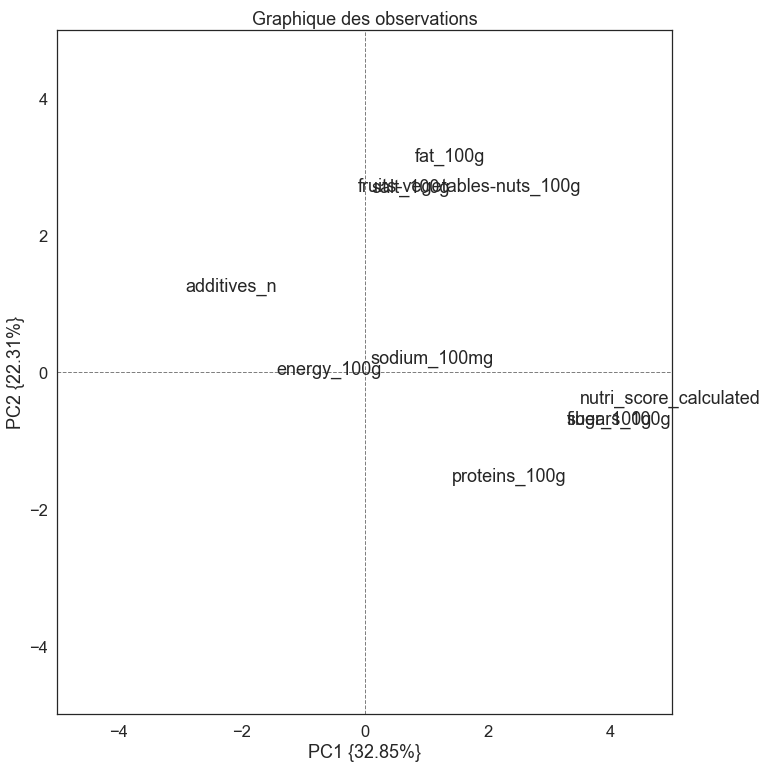

In [50]:
# positionnement des individus dans le premier plan
fig, ax = plt.subplots(figsize=(11, 11))

ax.set_xlim(-5, 5)  # même limites en abscisse
ax.set_ylim(-5, 5)  # et en ordonnée

# placement des étiquettes des observations
for i in range(11):
    plt.annotate(features[i], (X_pca[i, 0], X_pca[i, 1]))

# ajouter les axes
plt.plot([-5, 5], [0, 0], color="grey", linestyle="--", linewidth=1)
plt.plot([0, 0], [-5, 5], color="grey", linestyle="--", linewidth=1)

ax.set(
    title="Graphique des observations",
    xlabel="PC1 {"
    + str(np.round(pca.explained_variance_ratio_[:1] * 100, 2)[0])
    + "%}",
    ylabel="PC2 {"
    + str(np.round(pca.explained_variance_ratio_[1:2][0] * 100, 2))
    + "%}",
)

fig.tight_layout()

<img src='./images/logo_OC.png' width=20px align="left"/> &emsp;  Matrice de corrélation entre les composantes de l'ACP et les variables du dataset.

In [51]:
pca_to_df = pd.DataFrame.from_dict(dict(zip(pc_list, pca.components_)))
pca_to_df["variables"] = features
pca_to_df = pca_to_df.set_index("variables")

pca_to_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variables,,,,,,,,,,,
nutri_score_calculated,0.304899,0.455398,0.108841,0.150096,-0.176886,-0.032245,0.243421,0.210948,-0.723456,0.076189,-3.522156e-15
additives_n,-0.044540,0.451860,-0.263005,0.009114,0.497434,-0.236256,-0.540196,0.357589,0.040065,0.006312,-1.483122e-16
energy_100g,0.352660,0.158279,0.370667,0.035108,0.117200,0.173542,-0.409981,-0.536469,-0.067444,-0.455706,6.844468e-16
fat_100g,0.439095,0.023480,0.265697,-0.317143,0.010059,-0.166605,-0.137196,-0.134942,0.170954,0.735767,-5.173108e-16
saturated-fat_100g,0.428023,0.008649,0.246537,-0.264412,0.001871,-0.180265,0.278261,0.495759,0.367268,-0.442082,1.481963e-15
sugars_100g,-0.108706,0.346135,0.374152,0.645474,-0.045140,0.233799,0.093320,0.112743,0.446627,0.184803,2.437475e-15
fiber_100g,0.105620,-0.410488,0.174373,0.447425,0.518722,-0.498972,0.193968,-0.091964,-0.159252,0.016182,-8.605782e-16
proteins_100g,0.311864,-0.215330,-0.174235,0.007506,0.479871,0.727833,0.118336,0.180875,-0.073604,0.117499,-1.701677e-15
salt_100g,0.376976,-0.044256,-0.431525,0.282111,-0.232303,-0.081710,-0.068234,-0.070879,0.139380,-0.019565,-7.071068e-01


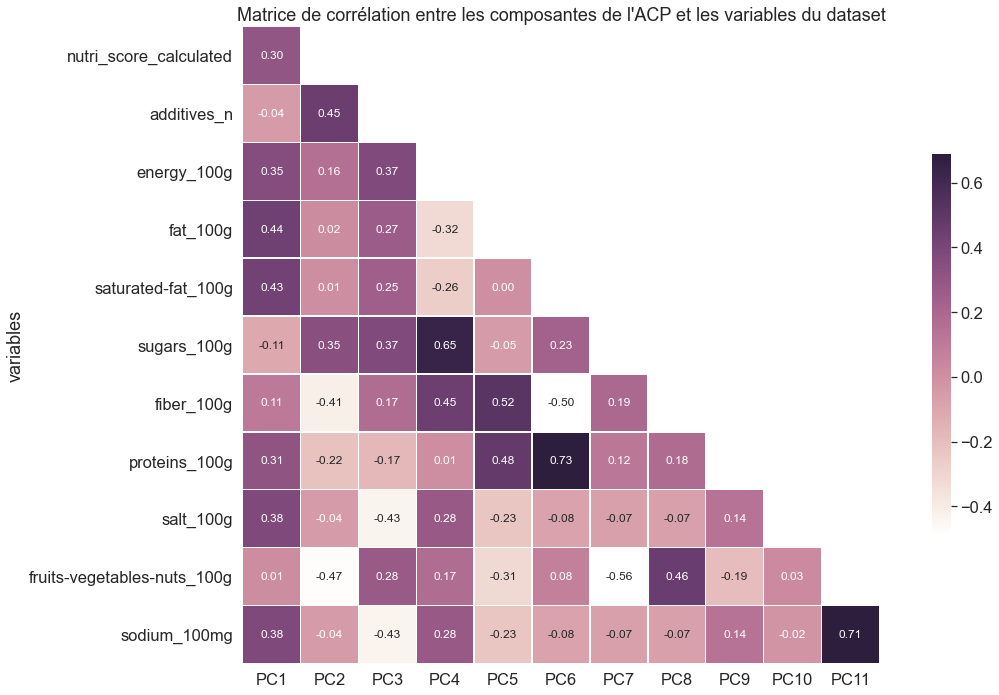

In [52]:
fig, ax = plt.subplots(figsize=(16, 10))


mask = np.triu(np.ones_like(pca_to_df, dtype=bool), k=1)

cmap = sns.cubehelix_palette(light=1, as_cmap=True)


ax = sns.heatmap(
    pca_to_df,
    mask=mask,
    cmap=cmap,
    square=True,
    linewidths=0.6,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 12},
    robust=True,
    cbar=True,
    cbar_kws={"shrink": 0.6},
)

ax.set(
    title="Matrice de corrélation entre les composantes de l'ACP et les variables du dataset"
)
ax.figure.tight_layout()

*********
# <font color=#7451eb> Chapitre 4 : Questions - Réponses</font>
*********

<img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Q1 - En France, quel est le % des produits vendus `Made in France` vs les produits `Not Made in France` ?

In [53]:
%config IPCompleter.use_jedi = True

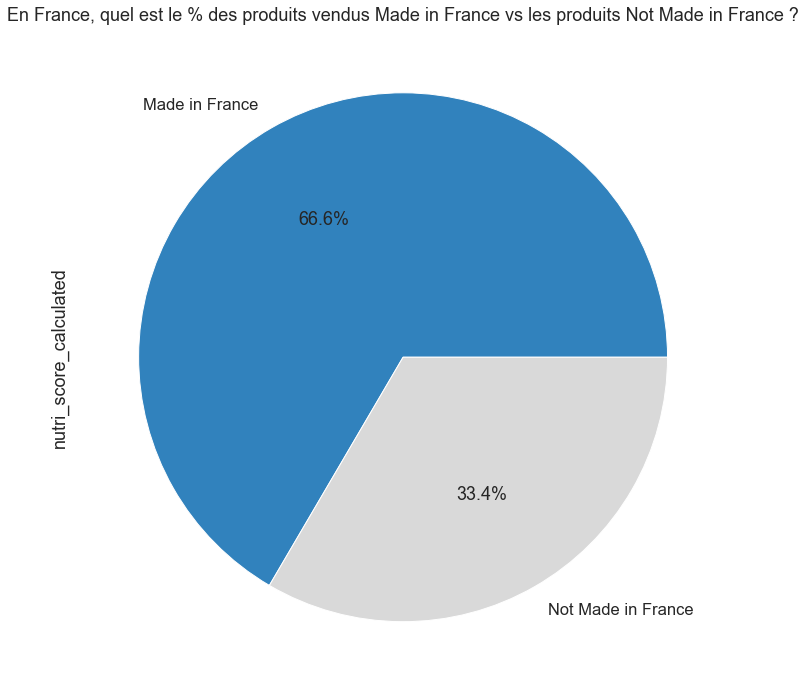

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))

Q1 = df_no_outliers.groupby("manufacturing_places")["nutri_score_calculated"].count()

ax = Q1.plot.pie(autopct="%.1f%%", cmap="tab20c")

ax.set(
    title="En France, quel est le % des produits vendus Made in France vs les produits Not Made in France ?"
)

ax.figure.tight_layout()

<img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Q2 - Entre les produits `Made in France` et les produits `Not Made in France`, lesquels ont un meilleur score grade ?

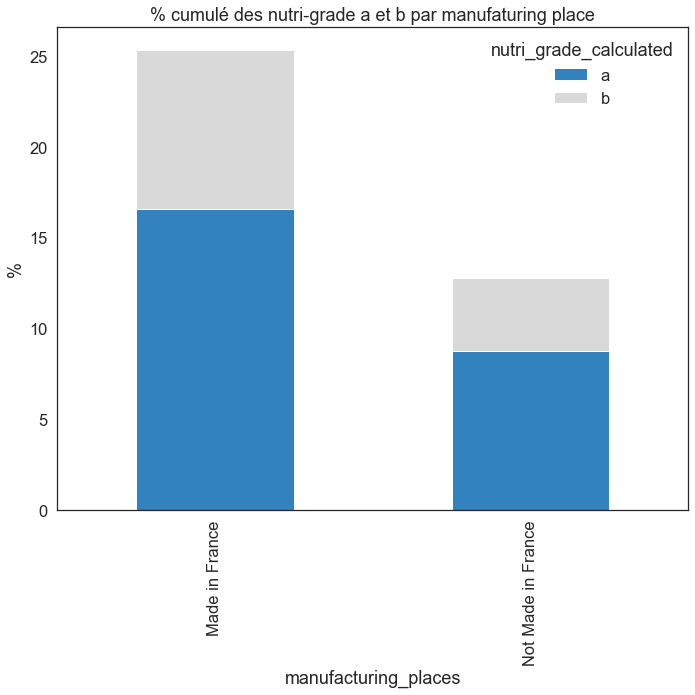

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))

Q2 = (
    pd.crosstab(
        index=df_no_outliers["manufacturing_places"],
        columns=df_no_outliers["nutri_grade_calculated"],
    )
    / df_no_outliers.shape[0]
) * 100

ax = Q2[["a", "b"]].plot.bar(stacked=True, ax=ax, cmap="tab20c")

ax.set(title="% cumulé des nutri-grade a et b par manufaturing place", ylabel="%")

fig.tight_layout()

<img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Q3 - Est-ce que la moyenne et l'écart-types des produits `Made in France` sont égaux aux produits `Not Made in France` ? 

mannwhitneyu Test

In [56]:
from scipy.stats import mannwhitneyu

* H0: les échantillons proviennent de la même distribution ==> ils ont la même moyenne, std, médiane.
* H1: Les échantillons ne proviennent de la même distribution ==> ils ont la même moyenne, std, médiane.

source du code : [lien](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/)

In [57]:
# generate two independent samples
made_In_France = df_no_outliers.loc[
    df_no_outliers["manufacturing_places"].isin(["Made in France"]),
    ["nutri_score_calculated"],
]
not_Made_In_France = df_no_outliers.loc[
    ~df_no_outliers["manufacturing_places"].isin(["Made in France"]),
    ["nutri_score_calculated"],
]

# compare samples
stat, p = mannwhitneyu(made_In_France, not_Made_In_France)
print("Statistics=%.3f, p=%.3f" % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print("Same distribution (fail to reject H0)")
else:
    print("Different distribution (reject H0)")

Statistics=404079728.500, p=0.000
Different distribution (reject H0)


 <img src='./images/logo_OC.png' width=20px align="left"/> &emsp; Q4 - Entre les produits `Made in France` et les produits `Not Made in France`, lesquels ont un meilleur score grade par catégorie ?

In [58]:
# Filter le dataframe et garder uniquement le nutri-grade a et b
df_nutri_grade_a_b = df_no_outliers[
    df_no_outliers["nutri_grade_calculated"].isin(["a", "b"])
]

# taille df initiale
n_df_no_outliers = df_no_outliers.shape[0]

In [59]:
Q4 = round(
    (
        pd.pivot_table(
            data=df_nutri_grade_a_b,
            values="nutri_grade_calculated",
            index="pnns_groups_1",
            columns="manufacturing_places",
            aggfunc="count",
        ).dropna()
        / n_df_no_outliers
    )
    * 100,
    2,
)

In [60]:
Q4

manufacturing_places,Made in France,Not Made in France
pnns_groups_1,,
Alcoholic beverages,0.27,0.21
Beverages,0.97,0.57
Cereals and potatoes,3.12,2.91
Composite foods,5.55,1.61
Fat and sauces,0.38,0.51
Fish Meat Eggs,3.74,1.47
Fruits and vegetables,2.88,1.40
Milk and dairy products,3.96,0.96
Salty snacks,1.16,0.43


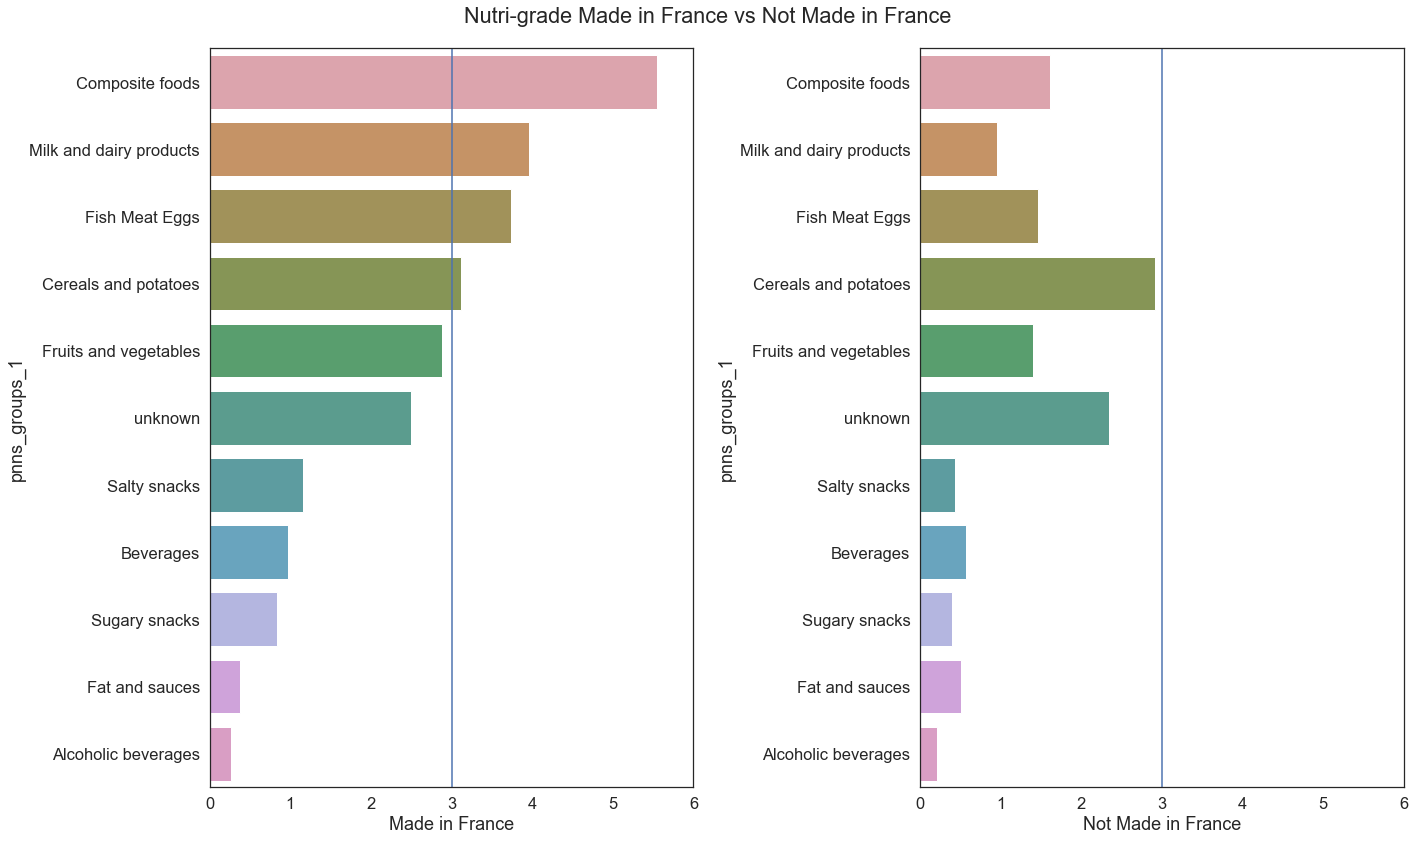

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 12))

sns.barplot(
    y=Q4.index,
    x="Made in France",
    data=Q4,
    orient="h",
    ax=ax[0],
    order=Q4["Made in France"].sort_values(ascending=False).index.tolist(),
    saturation=0.5,
)


sns.barplot(
    y=Q4.index,
    x="Not Made in France",
    data=Q4,
    orient="h",
    ax=ax[1],
    order=Q4["Made in France"].sort_values(ascending=False).index.tolist(),
    saturation=0.5,
)

ax[0].set(xlim=(0, 6))
ax[1].set(xlim=(0, 6))

ax[0].axvline(x=3)
ax[1].axvline(x=3)

fig.suptitle("Nutri-grade Made in France vs Not Made in France")
fig.tight_layout()